In [ ]:
# import library
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
import scipy.stats as st

from matplotlib import rcParams
rcParams['figure.figsize'] = (10,7)
rcParams['lines.linewidth'] = 2.5

#data prosesing

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from feature_engine import transformation as vt

In [ ]:
# read dataset
df = pd.read_csv('dataset/train.csv', sep=';')

In [ ]:
df.reset_index()

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# 1. Descriptive Statistics 

## Tipe data 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Kolom categorical 

In [ ]:
cat = df.select_dtypes(include='object')
catCol = cat.columns
print(f'Ada {len(catCol)} kolom categorical, yaitu:\n{catCol}')

Ada 10 kolom categorical, yaitu:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


## Kolom numerik 

In [ ]:
num = df.select_dtypes(include=['int64', 'float64'])
numCol = num.columns
print(f'Ada {len(numCol)} kolom categorical, yaitu:\n{numCol}')

Ada 7 kolom categorical, yaitu:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


## Check null values

In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Check duplicate  

In [ ]:
df.duplicated().sum()

0

## Summary kolom 

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Describe kolom numeric 

In [ ]:
df[numCol].describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Pada kolom balance, duration, dan pdays ada jarak yang cukup besar antara mean dengan mediannya. Kemungkinan pada ketiga kolom tersebut terdapat outliers.

### Describe kolom categoric 

In [ ]:
df[catCol].describe().T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


### Value counts tiap kolom categoric

In [ ]:
for col in catCol:
    print(f'Value counts kolom \033[1m{col}\033[0m:\n{df[col].value_counts()}\n')

Value counts kolom job:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Value counts kolom marital:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Value counts kolom education:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Value counts kolom default:
no     44396
yes      815
Name: default, dtype: int64

Value counts kolom housing:
yes    25130
no     20081
Name: housing, dtype: int64

Value counts kolom loan:
no     37967
yes     7244
Name: loan, dtype: int64

Value counts kolom contact:
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Value counts kolom month:
may    13766
jul     6895
aug     6247
jun     5341
nov 

## Kesimpulan

Semua tipe data dan nama kolom sudah sesuai

Tidak ada nilai kosong <br>
Tidak ada data duplikat

Ada nilai **minus** pada kolom **balance** dan **pdays**. <br>
Terdapat **gap** yang **besar** antara **nilai** pada kolom **y**, **default** dan **loan** <br> 
Perlu di handle pada pembersihan data.

# 2. Univariate Analysis

## Box plot kolom numeric 

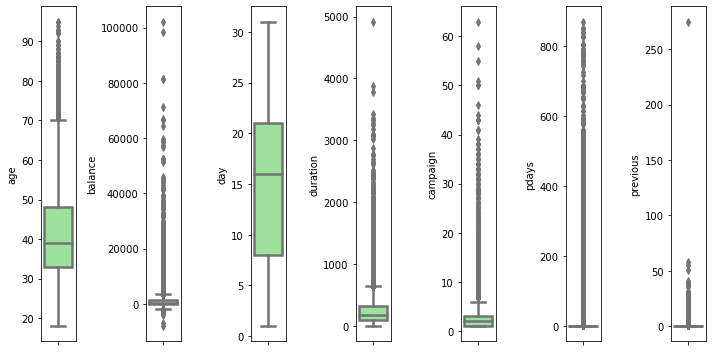

In [ ]:
plt.figure(figsize=(10,5))
for i in range(0, len(numCol)):
    plt.subplot(1, len(numCol), i+1)
    sns.boxplot(y=df[numCol[i]], color='lightgreen', orient='v')
    plt.tight_layout()

Semua kolom **punya** outliers, yang **paling banyak** ada pada kolom **balance**, **duration**, dan **pdays**

## Violin plot kolom numeric 

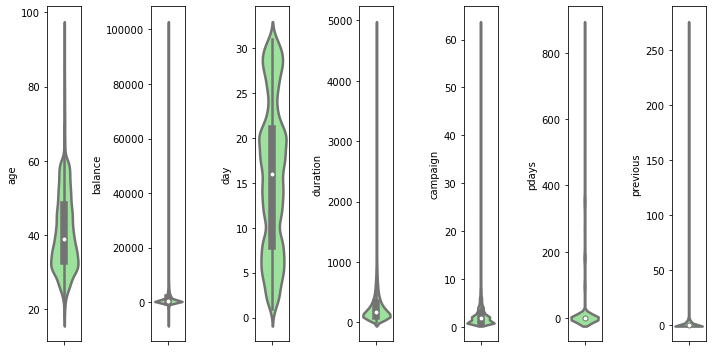

In [ ]:
plt.figure(figsize=(10,5))
for i in range(0, len(numCol)):
    plt.subplot(1, len(numCol), i+1)
    sns.violinplot(y=df[numCol[i]], color='lightgreen', orient='v')
    plt.tight_layout()

## individual displot kolom numeric

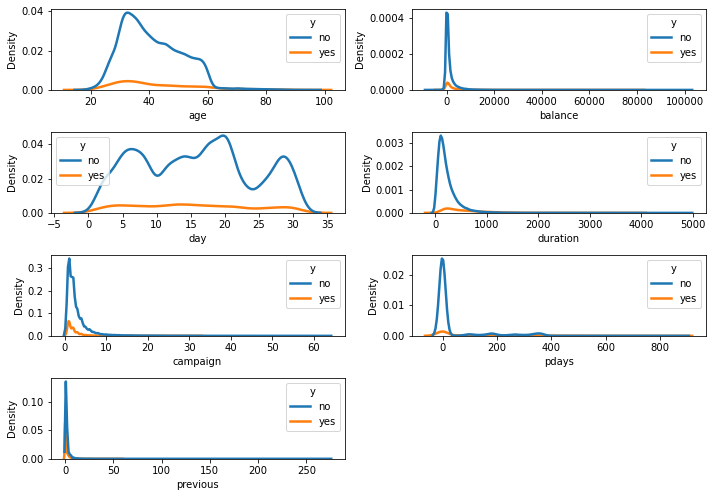

In [ ]:
for i in range(0, len(numCol)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=df[numCol[i]], color='red', hue=df['y'])
    plt.xlabel(numCol[i])
    plt.tight_layout()

**Hampir semua** kolom **numeric** **tidak berdistribusi normal**. <br>
Kolom **campaign**, **previous**, **duration**, dan **pdays** **tidak berdistribusi normal** (**positively skew**). <br>
Sedangkan kolom **day** berbentuk **bimodal**.

In [ ]:
df1 = df.copy()

In [ ]:
encoding_y = {
    'yes': 1,
    'no': 0
}

In [ ]:
df1['y'] = df1['y'].map(encoding_y)

## individual countplot kolom categorical

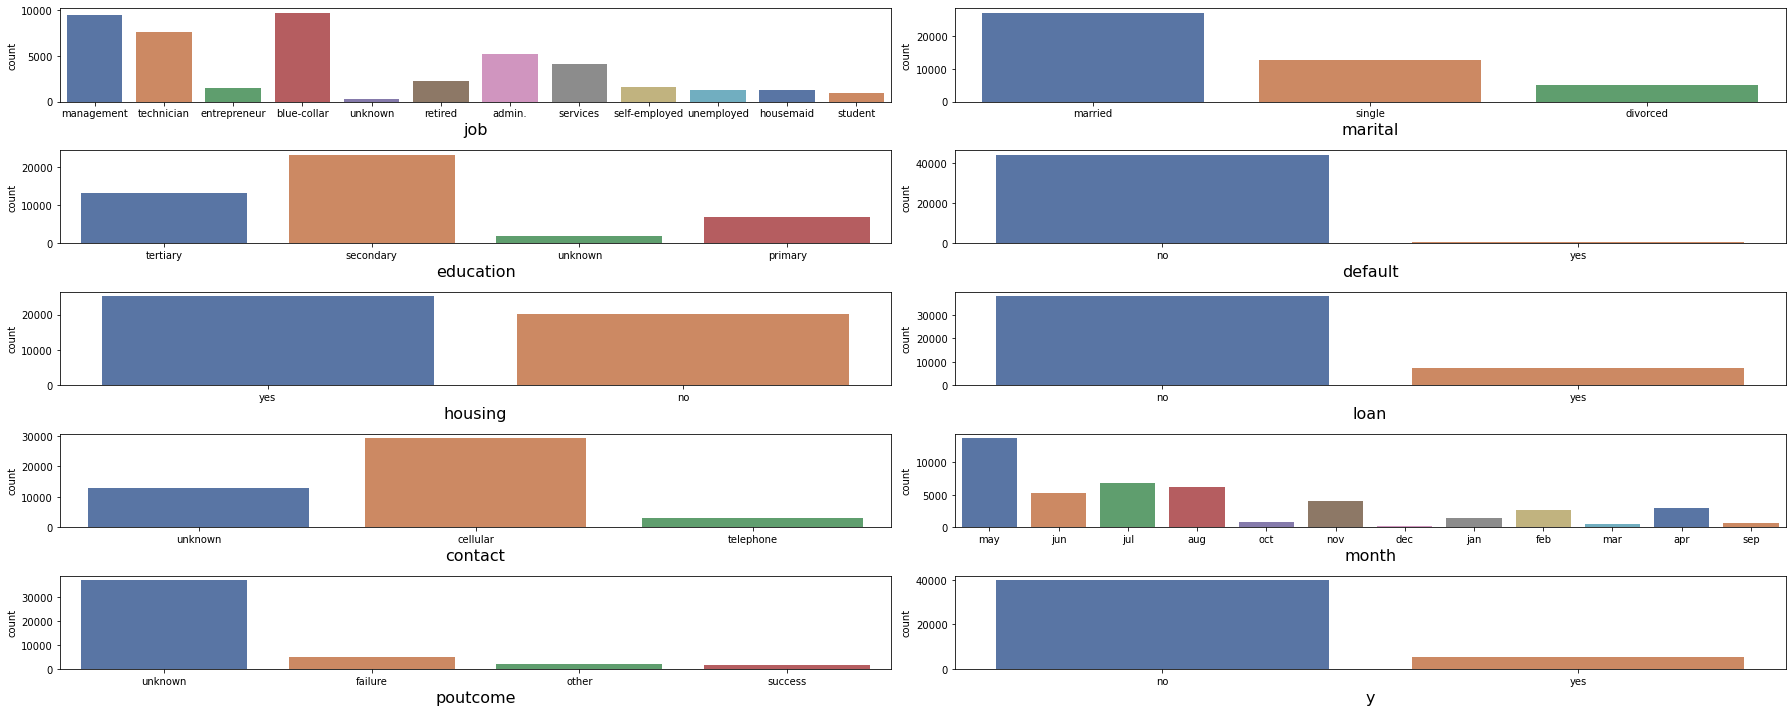

In [ ]:
plt.figure(figsize = (25,10))
for i in range(0, len(catCol)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[catCol[i]], palette='deep', orient='h')
    plt.tight_layout()
    plt.xlabel(xlabel=catCol[i],fontsize=16)

Kolom **y** yang **yes** jauh **lebih sedikit** dibandingkan yang **no** <br>
Kolom **loan** yang **yes** jauh **lebih sedikit** dibandingkan yang **no** <br>
Kolom **default** yang **yes** jauh **lebih sedikit** dibandingkan yang **no** <br>

# 3. Multivariate analysis

## Heatmap 

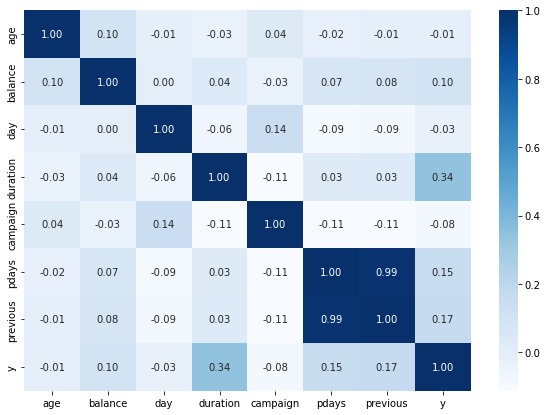

In [ ]:
sns.heatmap(df1.corr(method='spearman'), cmap='Blues', annot=True, fmt='.2f')
plt.show()

Karena hampir semua data belum berdistribusi normal, maka korelasi akan menggunakan korelasi spearman

Hampir semua kolom **tidak mempunyai** korelasi yang **kuat**. <br>
hanya ada kolom **pdays** dengan kolom **previous** dengan **nilai** korelasi mencapai **0.99**, bertanda redundant yang perlu dihandle<br>

## Pair Plot kolom numeric 

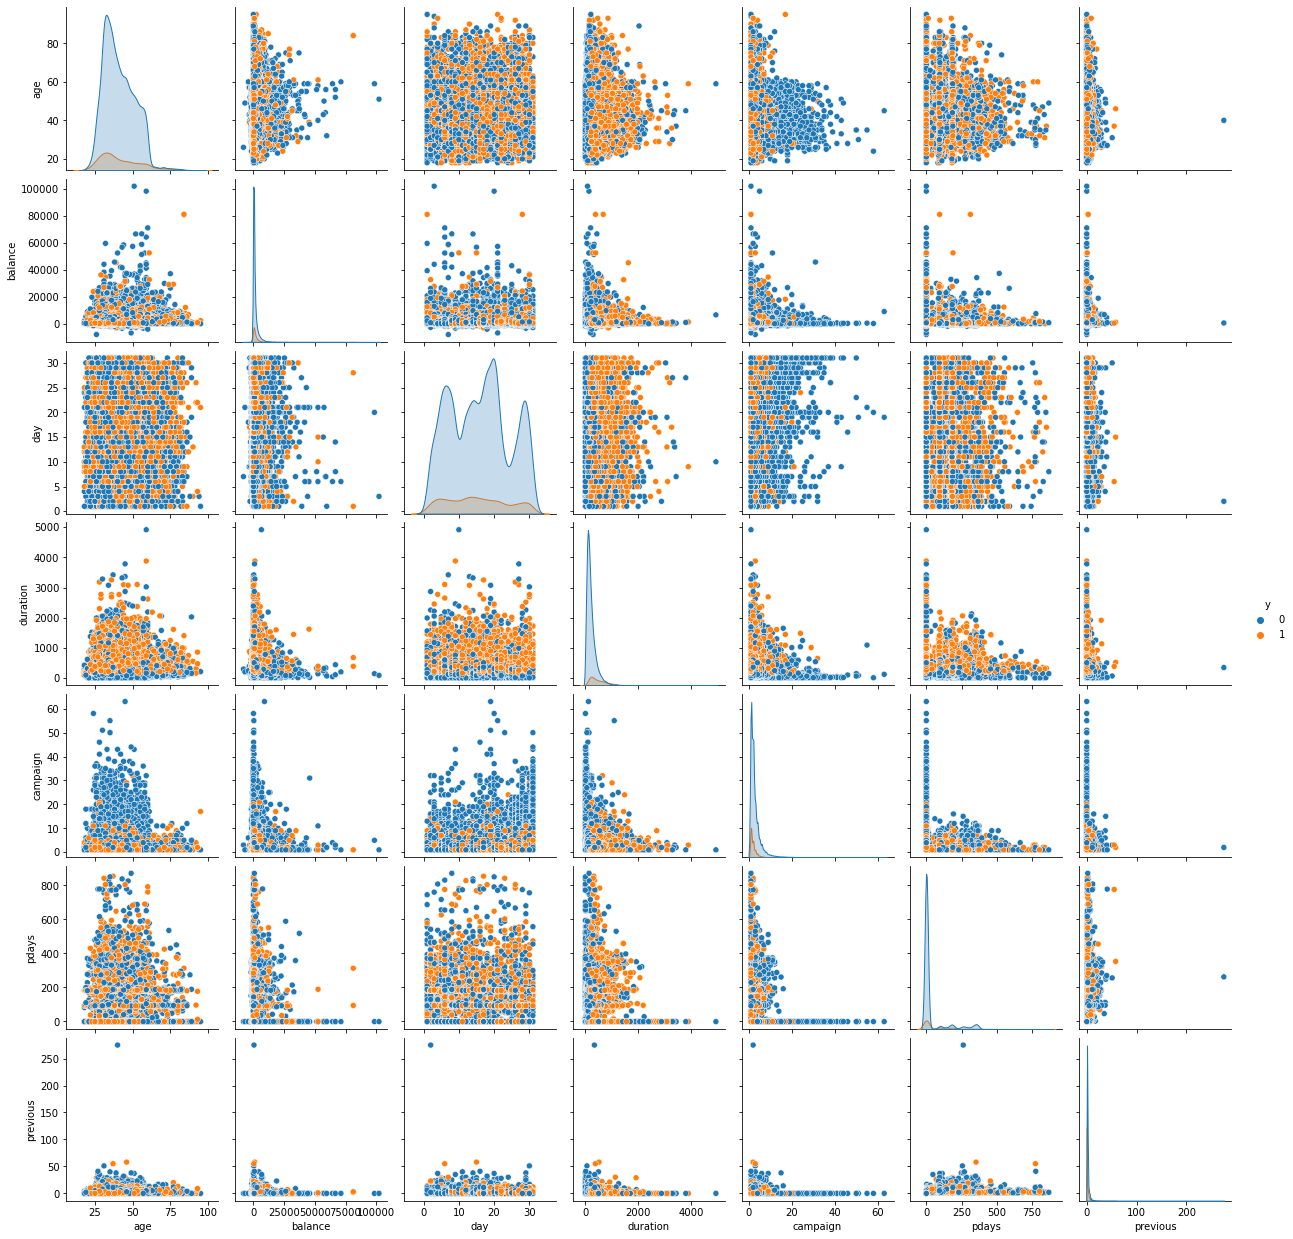

In [ ]:
sns.pairplot(df1, diag_kind='kde', hue='y')
plt.show()

## Strip plot kolom categorical dengan kolom kolom numeric

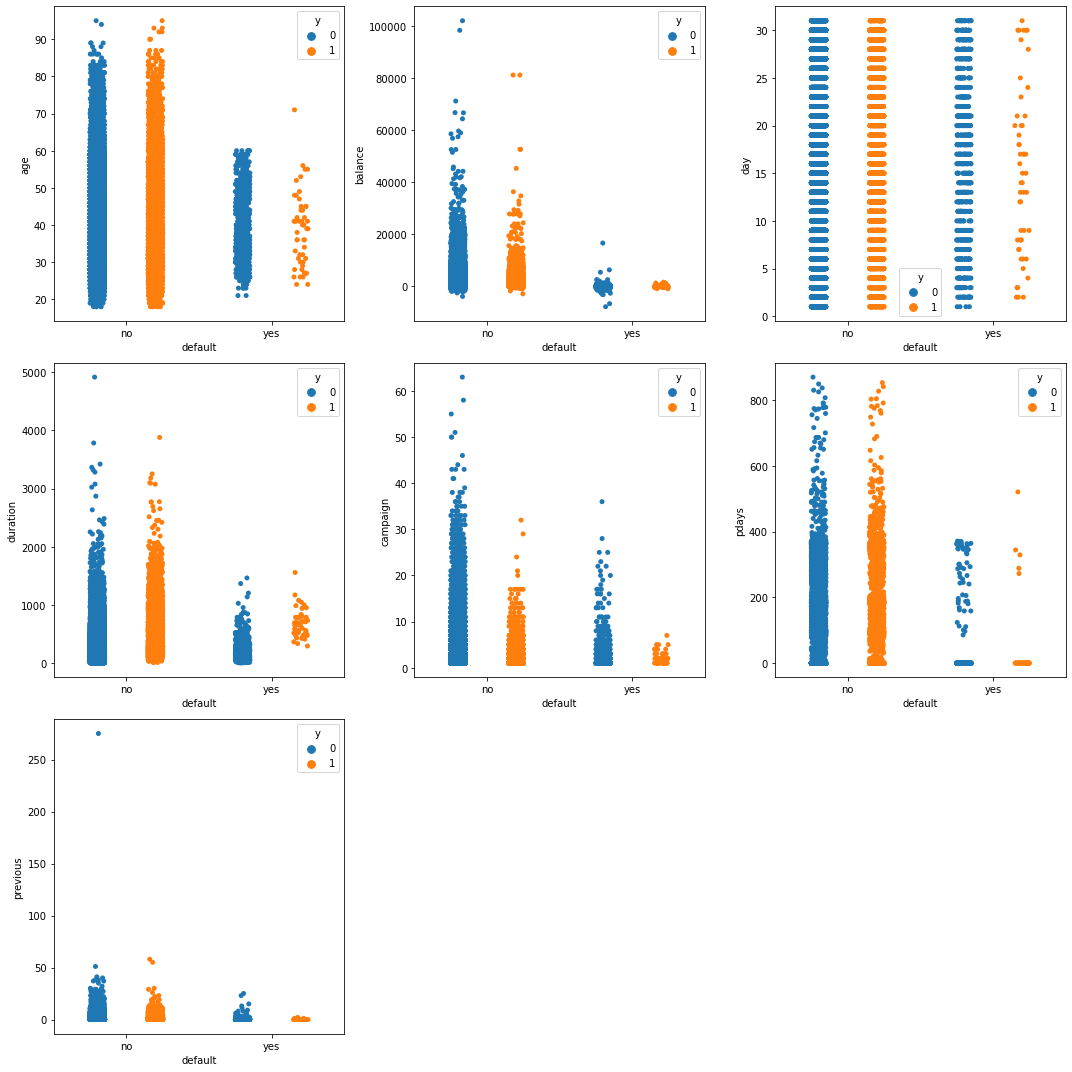

In [ ]:
fig = plt.figure(figsize=(15,15))
for i in range(0, len(numCol)):
    ax = fig.add_subplot(3,3, i+1)
    sns.stripplot(ax = ax, data=df, x='default', y=numCol[i], hue=df1['y'], dodge = True)
    plt.tight_layout()

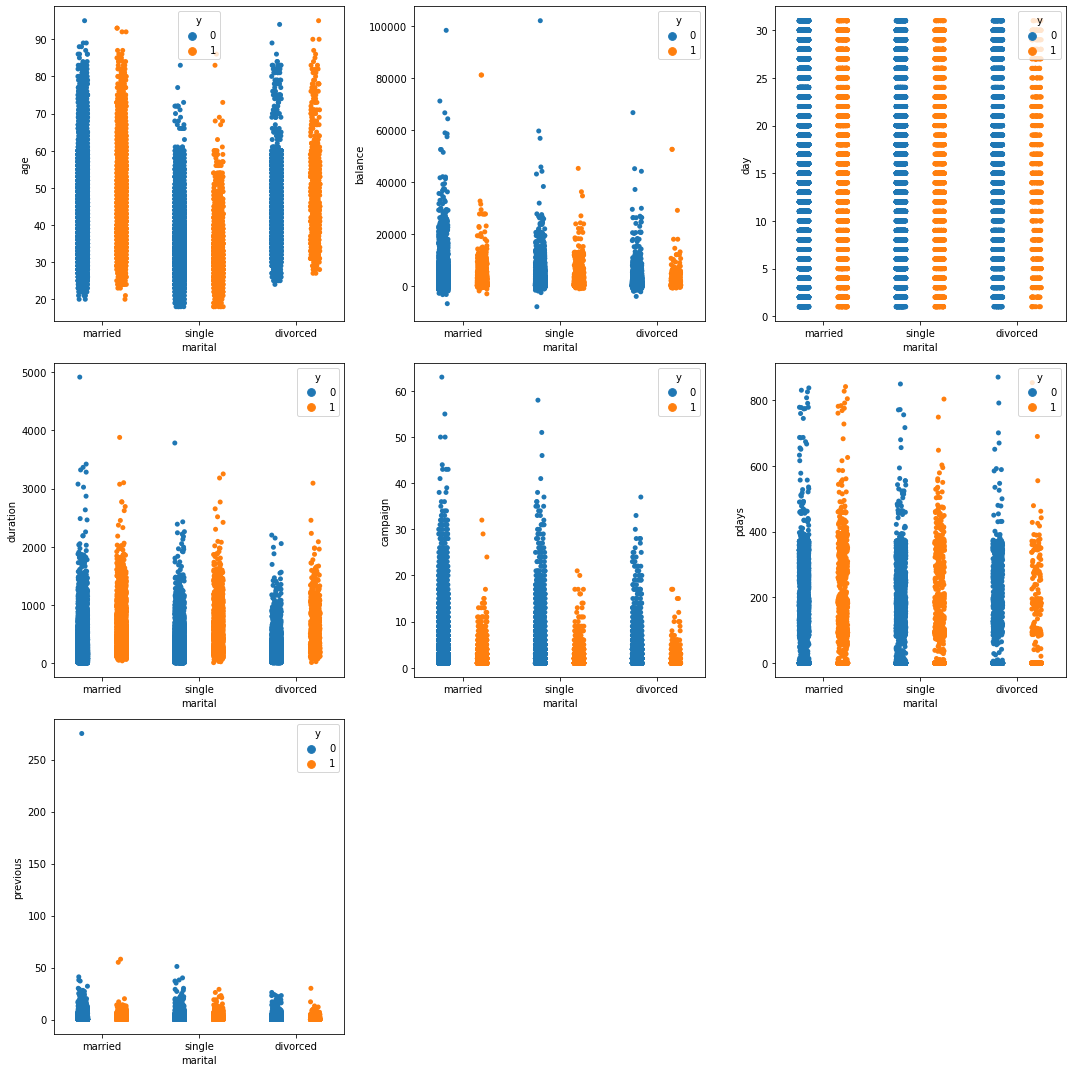

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numCol)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='marital', y=numCol[i], hue=df1['y'], dodge = True) # gambar catplot/stripplotnya
    plt.tight_layout()

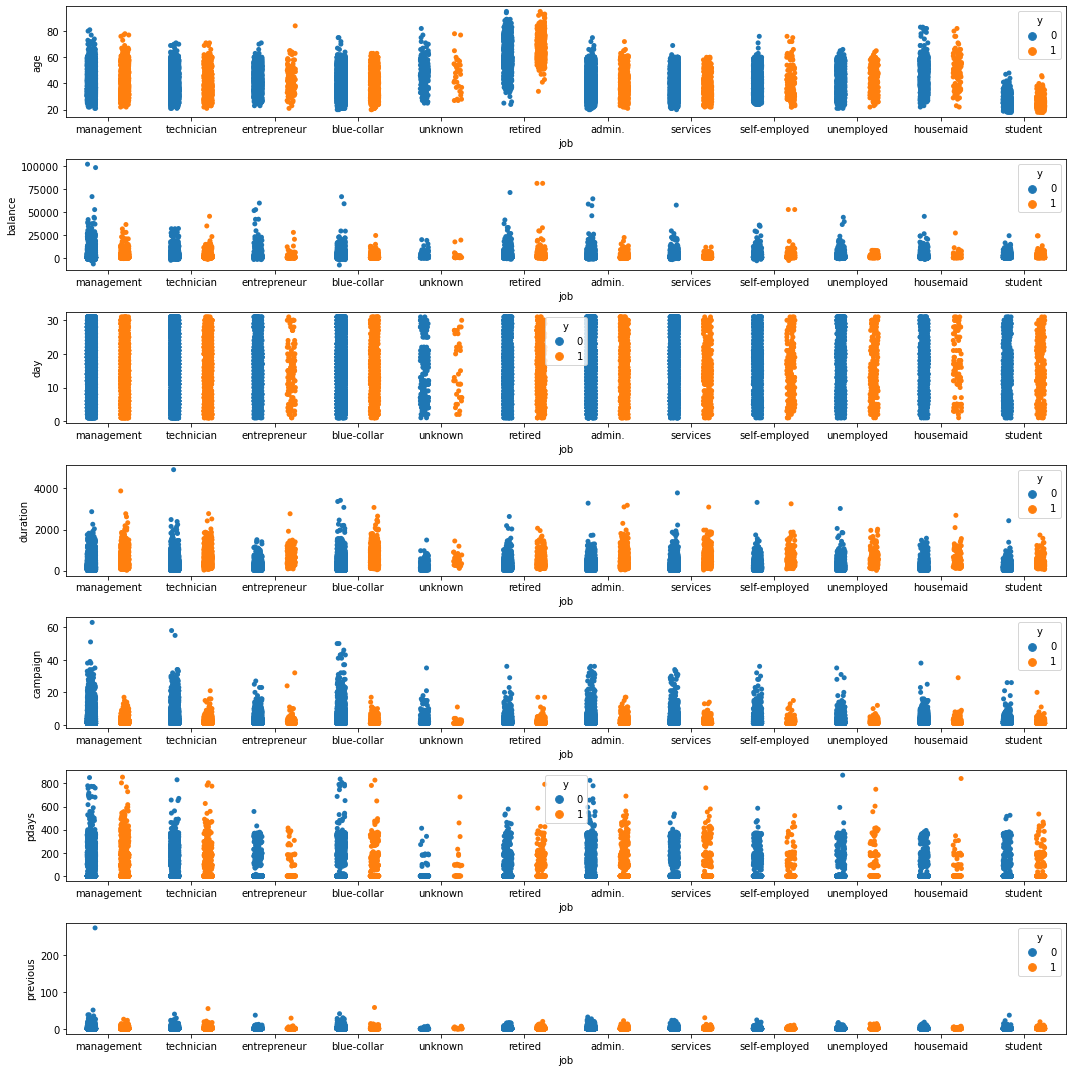

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numCol)): # untuk setiap kolom numerik
    ax = fig.add_subplot(7, 1, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='job', y=numCol[i], hue=df1['y'], dodge = True) # gambar catplot/stripplotnya
    plt.tight_layout()

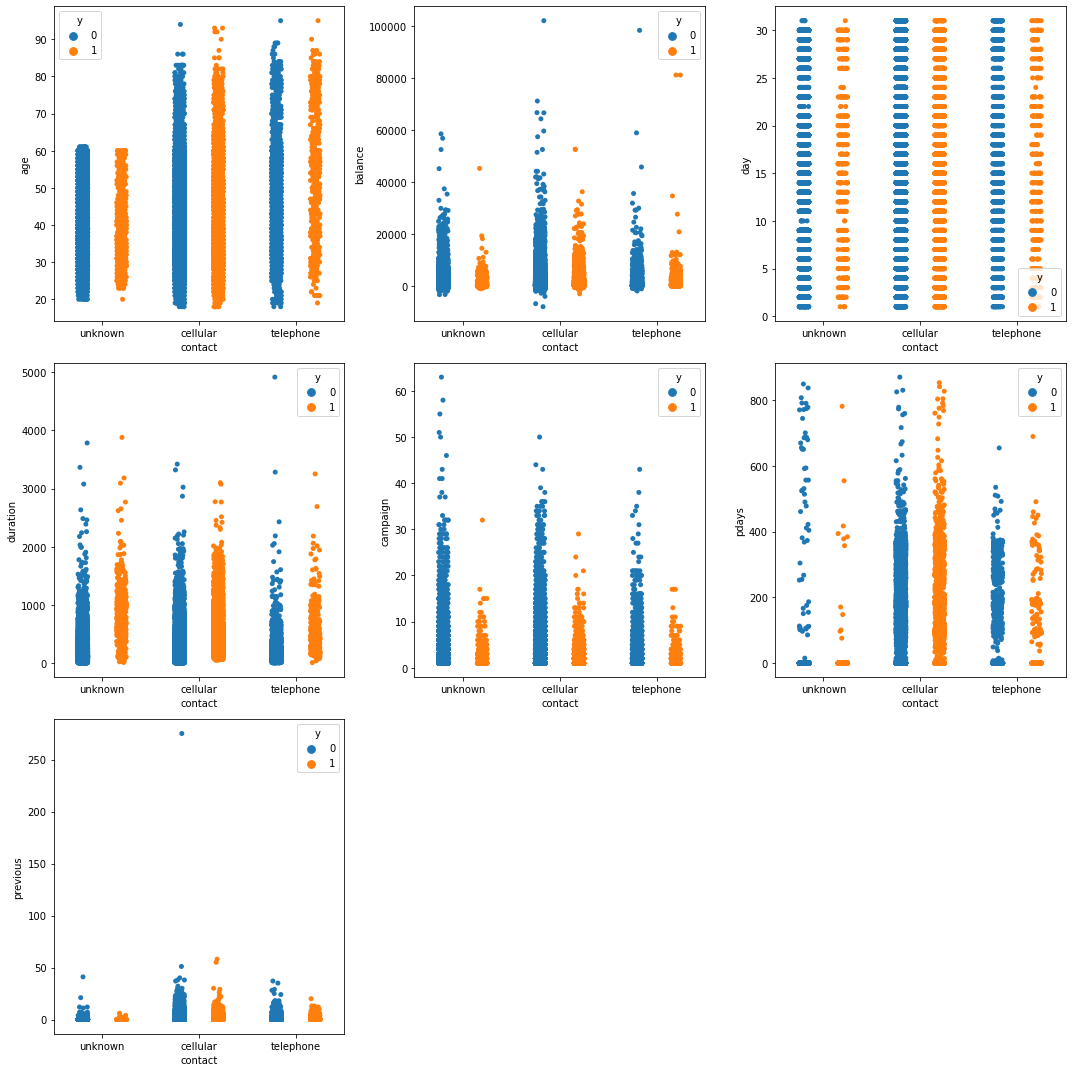

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numCol)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='contact', y=numCol[i], hue=df1['y'], dodge = True) # gambar catplot/stripplotnya
    plt.tight_layout()

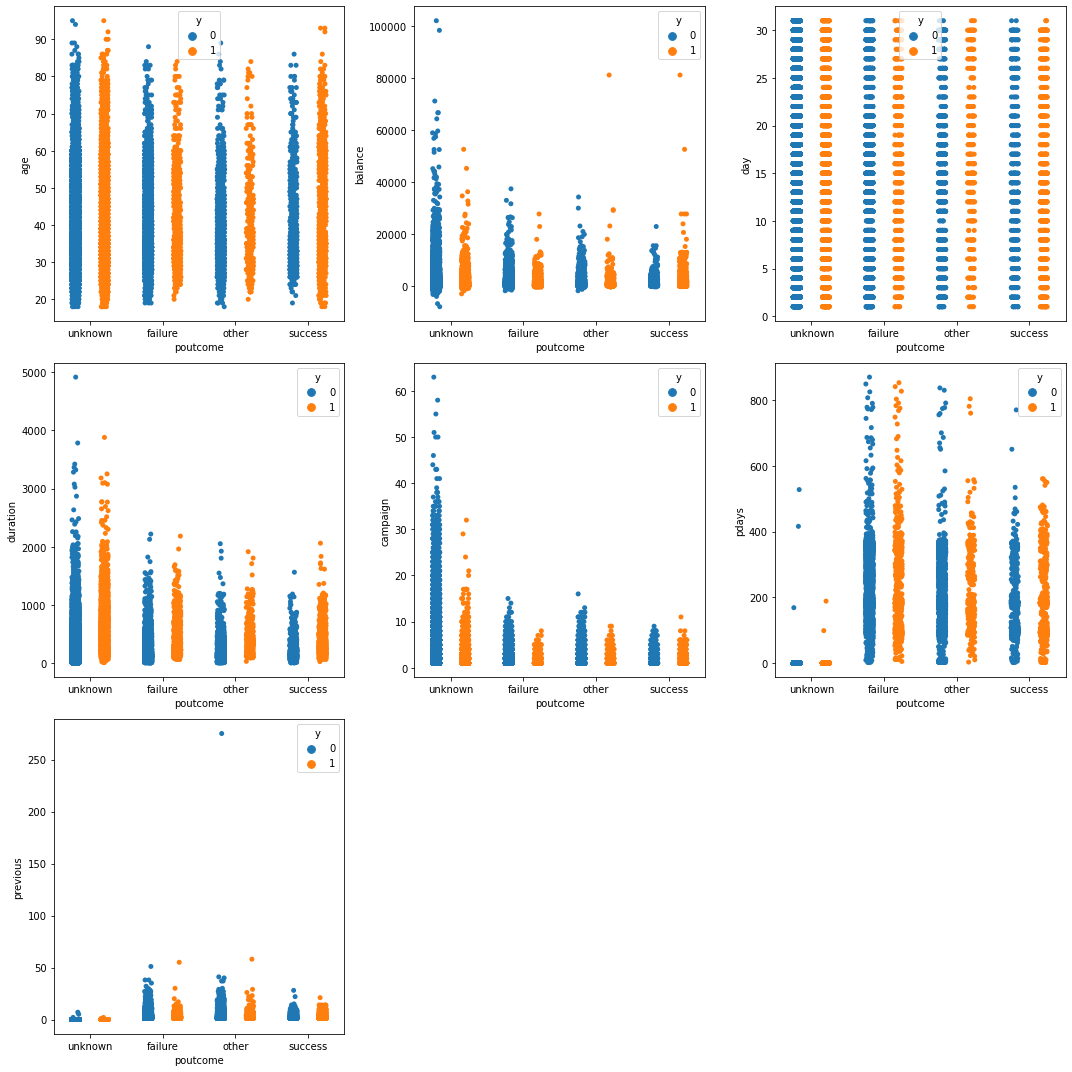

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numCol)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='poutcome', y=numCol[i], hue=df1['y'], dodge = True) # gambar catplot/stripplotnya
    plt.tight_layout()

## Kesimpulan 

1. Nasabah retired yang mengambil deposito kebanyakan berada di kelompok usia 50 tahun ke atas. <br>
2. Nasabah divorced yang mengambil deposito kebanyakan memiliki balance kurang dari 20000.<br>
3. Nasabah yang mengambil deposito:<br>
• Jika memiliki loan, balance-nya dibawah 20000<br>
• Jika tidak memiliki loan, balance-nya kebanyakan di bawah 40000<br>

# 4. Business Insight

In [ ]:
mapping_y = {'yes': 1,
             'no': 0}

df['y'] = df['y'].map(mapping_y)
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
10933,54,retired,single,secondary,no,515,yes,no,unknown,17,jun,205,1,-1,0,unknown,0
43822,29,management,married,tertiary,no,8103,no,no,cellular,28,may,473,3,-1,0,unknown,1
19584,31,technician,married,secondary,no,-556,yes,no,cellular,7,aug,115,2,-1,0,unknown,0


## Default and Loan

In [ ]:
df_default = df.groupby('default')['y'].sum()/(df['y'].sum())
df_loan = df.groupby('loan')['y'].sum()/(df['y'].sum())
print('\n', df_default)
print('\n', df_loan)


 default
no     0.990168
yes    0.009832
Name: y, dtype: float64

 loan
no     0.908489
yes    0.091511
Name: y, dtype: float64


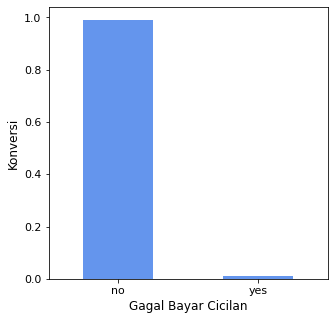

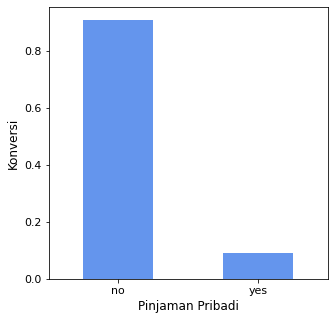

In [ ]:
plt.figure(figsize=(5,5))
df_default.plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Gagal Bayar Cicilan', fontsize=12)
plt.ylabel('Konversi', fontsize=12)
plt.show()

plt.figure(figsize=(5,5))
df_loan.plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Pinjaman Pribadi', fontsize=12)
plt.ylabel('Konversi', fontsize=12)
plt.show()

**Observation:** <br>
Nasabah yang mengambil deposito kurang lebih memiliki karakteristik sama, yaitu condong ke tidak punya riwayat gagal bayar cicilan dan tidak punya pinjaman pribadi.<br>

**Business Recommendation:**<br>
Menargetkan nasabah yang tidak punya riwayat gagal bayar cicilan dan tidak punya pinjaman pribadi.

## Month

In [ ]:
df_month = df.groupby('month')['y'].sum()/(df['y'].sum())
df_month = df_month.sort_values(ascending=False)
df_month

month
may    0.174891
aug    0.130081
jul    0.118548
apr    0.109094
jun    0.103233
feb    0.083381
nov    0.076196
oct    0.061070
sep    0.050860
mar    0.046890
jan    0.026848
dec    0.018907
Name: y, dtype: float64

In [ ]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

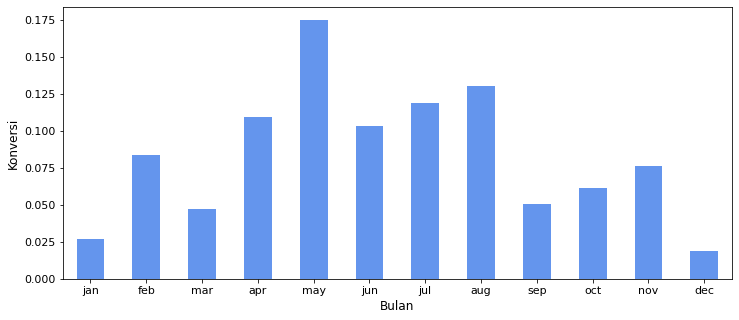

In [ ]:
plt.figure(figsize=(12,5))
df_month.loc[month_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Konversi', fontsize=12)
plt.show()

**Observation:**<br>
● Kebanyakan nasabah mengambil deposito pada Bulan Mei (late spring) untuk persiapan sebelum masuk tahun ajaran baru (September) atau persiapan sebelum libur akhir tahun (Desember).<br>
● Desember dan Januari merupakan bulan awal dan pertengahan musim dingin sehingga nasabah kemungkinan besar memilih menggunakan uangnya untuk memenuhi kebutuhan di musim dingin yang lebih tinggi dibanding musim lainnya.<br>

**Business Recommendation:**<br>
● Memberikan loyalty poin yang bisa ditukarkan dengan benefit tertentu, dengan nilai loyalty poin lebih besar di awal dan pertengahan winter.**

## Job

In [ ]:
df_job = df.groupby('job')['y'].sum()/(df['y'].sum())
df_job

job
admin.           0.119304
blue-collar      0.133863
entrepreneur     0.023256
housemaid        0.020609
management       0.245982
retired          0.097561
self-employed    0.035356
services         0.069767
student          0.050860
technician       0.158820
unemployed       0.038192
unknown          0.006428
Name: y, dtype: float64

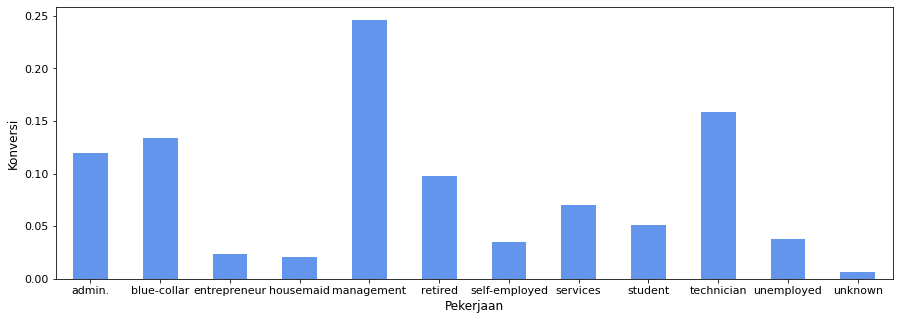

In [ ]:
plt.figure(figsize=(15,5))
df_job.plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Pekerjaan', fontsize=12)
plt.ylabel('Konversi', fontsize=12)
plt.show()

**Observation:** <br>
Pekerjaan di bidang management paling tinggi konversinya (24%)<br>

**Business Recommendation:**<br>
Mengutamakan nasabah yang berprofesi di bidang management, technician, blue-collar, admin, serta yang sudah pensiun sebagai target marketing.

## Age

In [ ]:
age_group = []
for x in df['age']:
    if x <=24 :
        age_group.append('early working')
    elif x <=54 :
        age_group.append('prime working')
    elif x <=64 :
        age_group.append('mature working')
    else:
        age_group.append('elderly')

df['age_group'] = age_group


In [ ]:
age_order = ['early working', 'prime working', 'mature working', 'elderly']

In [ ]:
df_age = df.groupby('age_group')['y'].sum()/(df['y'].sum())
df_age = df_age.sort_values(ascending=False)
df_age

age_group
prime working     0.775194
mature working    0.121195
elderly           0.064473
early working     0.039138
Name: y, dtype: float64

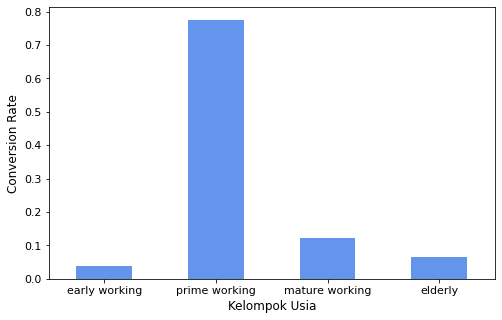

In [ ]:
plt.figure(figsize=(8,5))
df_age.loc[age_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Kelompok Usia', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

## Balance

In [ ]:
balance_group = []
for x in df['balance']:
    if x < 0:
        balance_group.append('<0')
    elif x <= 5000:
        balance_group.append('0-5000')
    elif x <= 10000:
        balance_group.append('5001-10000')
    elif x <= 25000:
        balance_group.append('10001-25000')
    else:
        balance_group.append('25000+')
        
df['balance_group'] = balance_group

In [ ]:
balance_order = ['<0', '0-5000', '5001-10000', '10001-25000', '25000+']

In [ ]:
df_balance = df.groupby('balance_group')['y'].sum()/(df['y'].sum())
df_balance = df_balance.sort_values(ascending=False)
df_balance

balance_group
0-5000         0.876914
5001-10000     0.057856
<0             0.039705
10001-25000    0.022310
25000+         0.003214
Name: y, dtype: float64

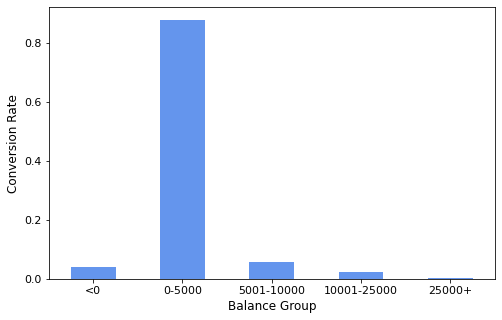

In [ ]:
plt.figure(figsize=(8,5))
df_balance.loc[balance_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Balance Group', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:**<br>
● Nasabah dengan kategori balance 0-5000 adalah yang paling banyak mengambil deposito (87%)<br>
● Nasabah dengan kategori prime working (usia 25-54) tahun adalah yang paling banyak mengambil deposito (77%)<br>

**Business Recommendation:**<br>
Mengutamakan nasabah yang memiliki balance 0-5000 dan berusia 25-54 tahun untuk menerima campaign.

## Duration 

In [ ]:
duration_group = []
for x in df['duration']:
    if x <= 180 :
        duration_group.append('0-3')
    elif x <= 360 :
        duration_group.append('3-6')
    elif x <= 540 :
        duration_group.append('6-9')
    elif x <= 720 :
        duration_group.append('9-12')
    elif x <= 900 :
        duration_group.append('12-15')
    elif x <= 1080:
        duration_group.append('15-18')
    elif x <= 1260:
        duration_group.append('18-21')
    elif x <= 1440:
        duration_group.append('22-25')
    elif x <= 1620:
        duration_group.append('25-28')
    else:
        duration_group.append('28+')

df['duration_group'] = duration_group

In [ ]:
duration_order = ['0-3','3-6','6-9','9-12','12-15','15-18','18-21','22-25','25-28','28+']

In [ ]:
df_duration = df.groupby('duration_group')['y'].sum()/(df['y'].sum())
df_duration

duration_group
0-3      0.134052
12-15    0.093023
15-18    0.065041
18-21    0.040083
22-25    0.021554
25-28    0.015126
28+      0.017016
3-6      0.290036
6-9      0.181887
9-12     0.142182
Name: y, dtype: float64

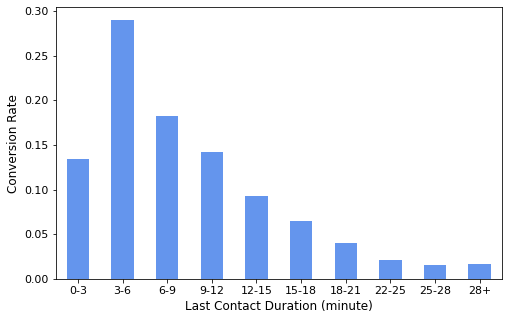

In [ ]:
plt.figure(figsize=(8,5))
df_duration.loc[duration_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Last Contact Duration (minute)', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

## Campaign 

In [ ]:
campaign_group = []
for x in df['campaign']:
    if x < 3 :
        campaign_group.append('1-2')
    elif x <5 :
        campaign_group.append('3-4')
    elif x <7 :
        campaign_group.append('5-6')
    elif x <9 :
        campaign_group.append('7-8')
    elif x <11 :
        campaign_group.append('9-10')
    elif x <13 :
        campaign_group.append('11-12')
    else:
        campaign_group.append('13+')

df['campaign_group'] = campaign_group

In [ ]:
campaign_order = ['1-2','3-4','5-6','7-8','9-10','11-12','13+']

In [ ]:
df_campaign = df.groupby('campaign_group')['y'].sum()/(df['y'].sum())
df_campaign

campaign_group
1-2      0.749102
11-12    0.003781
13+      0.005105
3-4      0.176782
5-6      0.043676
7-8      0.014937
9-10     0.006618
Name: y, dtype: float64

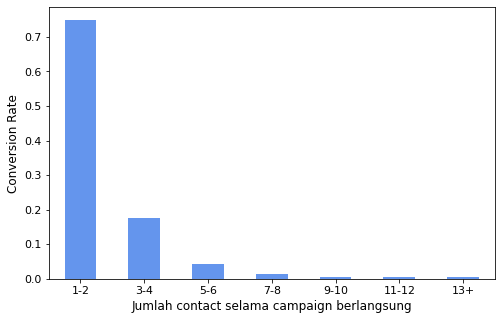

In [ ]:
plt.figure(figsize=(8,5))
df_campaign.loc[campaign_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Jumlah contact selama campaign berlangsung', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:**<br>
● Nasabah dengan durasi telepon terakhir 3-6 menit memiliki konversi tertinggi (29%)<br>
● Nasabah dengan kategori 1-2 kali kontak selama campaign berlangsung adalah yang paling banyak mengambil deposito (75%)<br>

**Business Recommendation:**<br>
Memperbaiki kualitas telemarketer, sebisa mungkin mempertahankan pembicaraan berbobot selama 3-6 menit dengan jumlah kontak dengan nasabah selama campaign berlangsung sebanyak 1-2 kali.

## Duration and Campaign

In [ ]:
df['minute'] = df['duration'].apply(lambda x: x/60)

<Figure size 720x360 with 0 Axes>

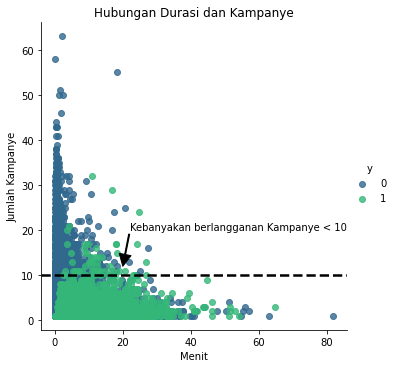

In [ ]:
plt.figure(figsize=(10,5))
sns.lmplot(x='minute',y='campaign', hue='y', data=df, fit_reg=False, palette='viridis')
plt.title('Hubungan Durasi dan Kampanye')
plt.axhline(y=10, ls='--', c='black')
plt.annotate('Kebanyakan berlangganan Kampanye < 10',xytext = (22,20),
             arrowprops=dict(color = 'black', width=1),xy=(20,12))
plt.xlabel('Menit')
plt.ylabel('Jumlah Kampanye')
plt.show()

**Observation:**<br>
Calon nasabah yang dikampanye kurang dari 10 kali dan dihubungi dengan durasi kurang dari 20 menit berpotensi membuka tabungan deposito berjangka

## Age and Balance

In [ ]:
df.rename(index=str, columns={'y': 'response'}, inplace = True)

def convert(df, new_column, old_column):
    df[new_column] = df[old_column].apply(lambda x: 0 if x == 0 else 1)
    return df[new_column].value_counts()

convert(df, "response_binary", "response")

0    39922
1     5289
Name: response_binary, dtype: int64

In [ ]:
age_balance1 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response_binary'].sum())
age_balance2 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response'].count())

age_balance1['response'] = age_balance2['response']
age_balance1['response_rate'] = age_balance1['response_binary']/ (age_balance1['response'])
age_balance1 = age_balance1.drop(['response_binary','response'],axis =1)

age_balance1 = age_balance1.unstack()

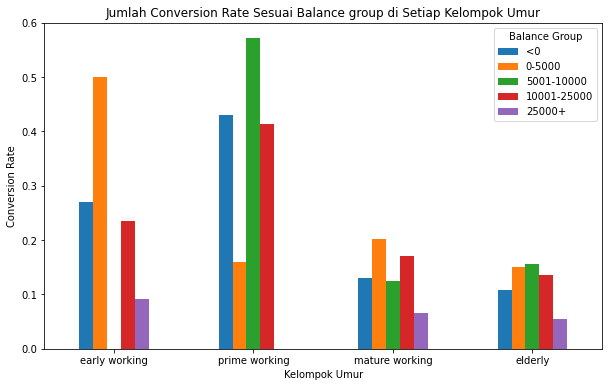

In [ ]:
age_bal = age_balance1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(4),('early working', 'prime working', 'mature working', 'elderly'),rotation = 'horizontal')

# Set legend
plt.legend(['<0', '0-5000', '5001-10000', '10001-25000', '25000+'], loc='upper right', title='Balance Group', ncol = 1)
plt.ylabel('Conversion Rate')
plt.xlabel('Kelompok Umur')
plt.title('Jumlah Conversion Rate Sesuai Balance group di Setiap Kelompok Umur')
plt.show()

**Insight** Pelanggan 'ya' untuk kelompok usia yang berbeda: keinginan untuk berlangganan sangat tinggi untuk orang berusia di antara 25-54 tahun dan orang yang lebih muda berusia di bawah 25 tahun juga memiliki tingkat berlangganan yang lebih tinggi daripada kelompok usia lainnya. Bank harus memprioritaskan telemarketingnya kepada klien yang berusia di di antara 25-54 yang memiliki saldo di antara 5001-25000, karena mereka memiliki tingkat penerimaan tertinggi sekitar 13.9% . Kelompok berikutnya yang harus menjadi fokus bank adalah kelomopk early working dengan saldo 0-5000, yang menunjukkan tingkat berlangganan yang tinggi antara 5%.

# Insight yang didapat

1. Nasabah yang mengambil deposito kurang lebih memiliki karakteristik sama, yaitu condong ke tidak punya riwayat gagal bayar cicilan dan tidak punya pinjaman pribadi.
2. Kebanyakan nasabah mengambil deposito pada Bulan Mei (late spring) untuk persiapan sebelum masuk tahun ajaran baru (September) atau persiapan sebelum libur akhir tahun (Desember).
3. Desember dan Januari merupakan bulan awal dan pertengahan musim dingin sehingga nasabah kemungkinan besar memilih menggunakan uangnya untuk memenuhi kebutuhan di musim dingin yang lebih tinggi dibanding musim lainnya.
3. Pekerjaan di bidang management paling tinggi konversinya (24%).
4. Nasabah dengan kategori balance 0-5000 adalah yang paling banyak mengambil deposito (87%).
5. Nasabah dengan kategori prime working (usia 25-54) tahun adalah yang paling banyak mengambil deposito (77%).
6. Nasabah dengan durasi telepon terakhir 3-6 menit memiliki konversi tertinggi (29%).
7. Nasabah dengan kategori 1-2 kali kontak selama campaign berlangsung adalah yang paling banyak mengambil deposito (75%)
8. Nasabah dengan kategori prime working (usia 25-54) tahun adalah yang paling banyak mengambil deposito dengan conversion rate 9%.
9. Nasabah dengan kategori balance 0-5000 adalah yang paling banyak mengambil deposito dengan conversion rate 10.2%.
10. Pelanggan 'ya' untuk kelompok usia yang berbeda: keinginan untuk berlangganan sangat tinggi untuk orang berusia di antara 25-54 tahun dan orang yang lebih muda berusia di bawah 25 tahun juga memiliki tingkat berlangganan yang lebih tinggi daripada kelompok usia lainnya. Bank harus memprioritaskan telemarketingnya kepada klien yang berusia di di antara 25-54 yang memiliki saldo di antara 5001-25000, karena mereka memiliki tingkat penerimaan tertinggi sekitar 13.9% . Kelompok berikutnya yang harus menjadi fokus bank adalah kelomopk early working dengan saldo 0-5000, yang menunjukkan tingkat berlangganan yang tinggi antara 5%.

# Business Recommendations
 

1. Menargetkan nasabah yang tidak punya riwayat gagal bayar cicilan dan tidak punya pinjaman pribadi.
2. Memberikan loyalty poin yang bisa ditukarkan dengan benefit tertentu, dengan nilai loyalty poin lebih besar di awal dan pertengahan winter.
3. Mengutamakan nasabah yang berprofesi di bidang management, technician, blue-collar, admin, serta yang sudah pensiun sebagai target marketing.
4. Mengutamakan nasabah yang memiliki balance 0-5000 dan berusia 25-54 tahun untuk menerima campaign.
5. Memperbaiki kualitas telemarketer, sebisa mungkin mempertahankan pembicaraan berbobot selama 3-6 menit dengan jumlah kontak dengan nasabah selama campaign berlangsung sebanyak 1-2 kali.
6. Tidak menelepon klien lebih dari 10 kali yang dapat mengganggu dan meningkatkan ketidakpuasan.
7. Bank harus memprioritaskan telemarketingnya kepada klien yang :<br>
a. berusia di antara 25-54 yang memiliki saldo di antara 5001-25000<br>
b. berusia kurang dari 25 tahun dengan saldo 0-5000.

# Save Dataset Stage 1

In [ ]:
#membuang kolom kategorikal
drop_col = ['response', 'age_group', 'balance_group', 'duration_group', 'campaign_group', 'minute']
df_new = df.drop(drop_col,axis=1)

In [ ]:
df_new.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response_binary
13862,35,blue-collar,married,primary,no,0,yes,no,cellular,10,jul,421,1,-1,0,unknown,0
15787,41,services,married,secondary,no,171,no,no,cellular,21,jul,71,9,-1,0,unknown,0
31129,59,unemployed,married,secondary,no,1047,no,no,cellular,18,feb,83,3,-1,0,unknown,1
40765,52,housemaid,married,primary,no,618,yes,yes,cellular,10,aug,352,2,102,2,failure,0
40481,82,retired,married,primary,no,8603,no,no,cellular,7,jul,429,1,-1,0,unknown,1


In [ ]:
df_new.to_excel('df_stage1.xlsx', index=False)

versi 1

In [ ]:
mean_campaign = df_new['campaign'].mean()

In [ ]:
mean_duration = df_new['duration'].mean()

In [ ]:
total_duration_per_nasabah = mean_campaign*mean_duration/60
total_duration_per_nasabah

11.892026939304317

In [ ]:
cost_call_per_minute = 0.6 + (0.23*0.6)
cost_call_per_minute

0.738

In [ ]:
total_cost_per_nasabah = cost_call_per_minute*total_duration_per_nasabah
total_cost_per_nasabah

8.776315881206585

In [ ]:
total_cost = total_cost_per_nasabah*df_new['response_binary'].count()
total_cost

396786.01730523095

In [ ]:
interest_rate_spread = 4/100
interest_rate_spread

0.04

In [ ]:
positive_response = df_new['response_binary'].sum()

In [ ]:
total_response = df_new['response_binary'].count()

Data Test

In [ ]:
total_cost_test_before = total_cost_per_nasabah*(7634+1004)
total_cost_test_before

75809.81658186248

In [ ]:
conversion_rate_before = 1004/(7634+1004)
conversion_rate_before

0.116230608937254

In [ ]:
total_cost_test_after = total_cost_per_nasabah*(293+488)
total_cost_test_after

6854.302703222344

In [ ]:
roi_before = (1004*interest_rate_spread*2000 - total_cost_test_before)
roi_before

4510.183418137531

In [ ]:
conversion_rate_after = 488/(293+488)
conversion_rate_after

0.6248399487836107

In [ ]:
roi_after = (488*interest_rate_spread*2000 - total_cost_test_after)
roi_after

32185.697296777656

In [ ]:
peningkatan_roi = roi_after/roi_before
peningkatan_roi

7.136228022865789

In [ ]:
# for collab

!pip install feature_engine

In [ ]:
# import library
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
import scipy.stats as st

from matplotlib import rcParams
rcParams['figure.figsize'] = (10,7)
rcParams['lines.linewidth'] = 2.5

#data prosesing

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from feature_engine import transformation as vt

import math
from scipy.stats import kstest

from sklearn.model_selection import StratifiedKFold

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_stage1 = pd.read_excel(r'df_stage1.xlsx')

In [ ]:
df_stage1.sample()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response_binary
9195,55,admin.,single,secondary,no,533,no,no,unknown,5,jun,40,2,-1,0,unknown,0


In [ ]:
df_stage1.shape

(45211, 17)

In [ ]:
# delete value 'unknown' in fitur 'job'
df_stage1.reset_index(inplace=True)
df_stage1 = df_stage1.set_index("job")
df_stage1 = df_stage1.drop(['unknown'])
df_stage1.reset_index(inplace=True)

In [ ]:
# delete value 'unknown' in fitur 'education'
df_stage1 = df_stage1.set_index("education")
df_stage1 = df_stage1.drop(['unknown'])
df_stage1.reset_index(inplace=True)
df_stage1 = df_stage1.set_index("index")

In [ ]:
df_stage1

,education,job,age,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response_binary
index,,,,,,,,,,,,,,,,,
0,tertiary,management,58,married,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,secondary,technician,44,single,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,secondary,entrepreneur,33,married,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
5,tertiary,management,35,married,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0
6,tertiary,management,28,single,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,tertiary,technician,51,married,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,primary,retired,71,divorced,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,secondary,retired,72,married,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1


# Data Pre-Processing

## Split Data Train and Test

In [ ]:
#pemisahan feature dan target
X = df_stage1.drop('response_binary', axis=1)
y = df_stage1[['response_binary']].copy()

In [ ]:
X.sample(3)

,education,job,age,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
index,,,,,,,,,,,,,,,,
33048,secondary,admin.,37,married,no,6127,yes,no,cellular,17,apr,1038,2,-1,0,unknown
6183,secondary,admin.,32,single,no,146,no,no,unknown,27,may,111,10,-1,0,unknown
36189,secondary,admin.,31,single,no,78,yes,no,cellular,11,may,360,1,370,1,other


In [ ]:
y.sample(3)

,response_binary
index,
10369,0
33554,0
44130,0


In [ ]:
X.shape

(43193, 16)

In [ ]:
y.shape

(43193, 1)

### Stratified K-Fold 

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(X, y):
	# select rows
	train_X, test_X = X.iloc[train_ix], X.iloc[test_ix]
	train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
	# summarize train and test composition
	train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
	test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
	print('>Train: 0={}, 1={}, Test: 0={}, 1={}'.format(train_0, train_1, test_0, test_1))

>Train: 0=34554, 1=34554, Test: 0=8639, 1=8639
>Train: 0=34554, 1=34554, Test: 0=8639, 1=8639
>Train: 0=34554, 1=34554, Test: 0=8639, 1=8639
>Train: 0=34555, 1=34555, Test: 0=8638, 1=8638
>Train: 0=34555, 1=34555, Test: 0=8638, 1=8638


In [ ]:
train_X.sample(3)

,education,job,age,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
index,,,,,,,,,,,,,,,,
26164,primary,unemployed,32,single,no,911,no,yes,cellular,20,nov,42,7,-1,0,unknown
8148,secondary,admin.,59,divorced,no,3304,yes,no,unknown,2,jun,250,2,-1,0,unknown
10634,primary,admin.,39,married,no,237,no,no,unknown,16,jun,215,2,-1,0,unknown


In [ ]:
train_y.sample(3)

,response_binary
index,
8425,0
15477,0
39451,0


In [ ]:
test_X.sample(3)

,education,job,age,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
index,,,,,,,,,,,,,,,,
3504,secondary,technician,48,married,no,0,yes,yes,unknown,15,may,964,2,-1,0,unknown
20069,primary,housemaid,34,married,no,326,no,no,cellular,8,aug,17,7,-1,0,unknown
31705,primary,blue-collar,53,married,no,53,yes,no,cellular,7,apr,208,1,140,1,failure


In [ ]:
test_y.sample(3)

,response_binary
index,
15720,1
6110,0
25929,0


In [ ]:
train_y_val = train_y.value_counts()
df_y_val = pd.DataFrame(train_y_val, columns=['total']).reset_index()
df_y_val['percentage'] = df_y_val['total']/df_y_val['total'].sum()
df_y_val

,response_binary,total,percentage
0,0,30538,0.883751
1,1,4017,0.116249


In [ ]:
test_y_val = test_y.value_counts()
df_y_val = pd.DataFrame(test_y_val, columns=['total']).reset_index()
df_y_val['percentage'] = df_y_val['total']/df_y_val['total'].sum()
df_y_val

,response_binary,total,percentage
0,0,7634,0.883769
1,1,1004,0.116231


In [ ]:
#mengelompokan variabel berdasarkan tipe data kategorik dan numerikal data train
cats_train = []
nums_train = []

for i in train_X.columns:
    if train_X[i].dtype != 'object':
        nums_train.append(i)
    else:
        cats_train.append(i)
        
print('Numerikal', nums_train)
print('Kategorikal', cats_train)

Numerikal ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Kategorikal ['education', 'job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [ ]:
#mengelompokan variabel berdasarkan tipe data kategorik dan numerikal data test
cats_test = []
nums_test = []

for i in test_X.columns:
    if test_X[i].dtype != 'object':
        nums_test.append(i)
    else:
        cats_test.append(i)
        
print('Numerikal', nums_test)
print('Kategorikal', cats_test)

Numerikal ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Kategorikal ['education', 'job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [ ]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34555 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   education  34555 non-null  object
 1   job        34555 non-null  object
 2   age        34555 non-null  int64 
 3   marital    34555 non-null  object
 4   default    34555 non-null  object
 5   balance    34555 non-null  int64 
 6   housing    34555 non-null  object
 7   loan       34555 non-null  object
 8   contact    34555 non-null  object
 9   day        34555 non-null  int64 
 10  month      34555 non-null  object
 11  duration   34555 non-null  int64 
 12  campaign   34555 non-null  int64 
 13  pdays      34555 non-null  int64 
 14  previous   34555 non-null  int64 
 15  poutcome   34555 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.5+ MB


In [ ]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8638 entries, 1 to 45207
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   education  8638 non-null   object
 1   job        8638 non-null   object
 2   age        8638 non-null   int64 
 3   marital    8638 non-null   object
 4   default    8638 non-null   object
 5   balance    8638 non-null   int64 
 6   housing    8638 non-null   object
 7   loan       8638 non-null   object
 8   contact    8638 non-null   object
 9   day        8638 non-null   int64 
 10  month      8638 non-null   object
 11  duration   8638 non-null   int64 
 12  campaign   8638 non-null   int64 
 13  pdays      8638 non-null   int64 
 14  previous   8638 non-null   int64 
 15  poutcome   8638 non-null   object
dtypes: int64(7), object(9)
memory usage: 1.1+ MB


## Handling Missing or Invalid Value

In [ ]:
# cek nilai kosong data train
train_X.isnull().sum()

education    0
job          0
age          0
marital      0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [ ]:
# cek nilai kosong data test
test_X.isnull().sum()

education    0
job          0
age          0
marital      0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [ ]:
#Cek berapa banyak data pada nilai di tiap kolom kategorikal data train
for col in cats_train:
    print('Value counts column :', col)
    print('================')
    print(train_X[col].value_counts())
    print('\n')

Value counts column : education
secondary    18475
tertiary     10703
primary       5377
Name: education, dtype: int64


Value counts column : job
management       7422
blue-collar      7346
technician       5863
admin.           4072
services         3156
retired          1709
self-employed    1215
entrepreneur     1154
unemployed       1030
housemaid         949
student           639
Name: job, dtype: int64


Value counts column : marital
married     20730
single       9817
divorced     4008
Name: marital, dtype: int64


Value counts column : default
no     33930
yes      625
Name: default, dtype: int64


Value counts column : housing
yes    19435
no     15120
Name: housing, dtype: int64


Value counts column : loan
no     28890
yes     5665
Name: loan, dtype: int64


Value counts column : contact
cellular     22597
unknown       9823
telephone     2135
Name: contact, dtype: int64


Value counts column : month
may    10585
jul     5228
aug     4819
jun     3978
nov     3129
apr     2

In [ ]:
#Cek berapa banyak data pada nilai di tiap kolom kategorikal data test
for col in cats_test:
    print('Value counts column :', col)
    print('================')
    print(test_X[col].value_counts())
    print('\n')

Value counts column : education
secondary    4656
tertiary     2559
primary      1423
Name: education, dtype: int64


Value counts column : job
blue-collar      1932
management       1794
technician       1492
admin.            928
services          848
retired           436
self-employed     325
entrepreneur      257
housemaid         246
unemployed        244
student           136
Name: job, dtype: int64


Value counts column : marital
married     5216
single      2402
divorced    1020
Name: marital, dtype: int64


Value counts column : default
no     8481
yes     157
Name: default, dtype: int64


Value counts column : housing
yes    4857
no     3781
Name: housing, dtype: int64


Value counts column : loan
no     7196
yes    1442
Name: loan, dtype: int64


Value counts column : contact
cellular     5616
unknown      2463
telephone     559
Name: contact, dtype: int64


Value counts column : month
may    2607
jul    1373
aug    1218
jun    1002
nov     713
apr     587
feb     510
jan  

In [ ]:
#ubah tipo pada admin.
train_X['job'] = train_X['job'].replace('admin.','admin')
test_X['job'] = test_X['job'].replace('admin.','admin')

In [ ]:
train_X['job'].value_counts()

management       7422
blue-collar      7346
technician       5863
admin            4072
services         3156
retired          1709
self-employed    1215
entrepreneur     1154
unemployed       1030
housemaid         949
student           639
Name: job, dtype: int64

In [ ]:
test_X['job'].value_counts()

blue-collar      1932
management       1794
technician       1492
admin             928
services          848
retired           436
self-employed     325
entrepreneur      257
housemaid         246
unemployed        244
student           136
Name: job, dtype: int64

## Handling Duplicated Data

In [ ]:
#cek duplicat data train
train_X.duplicated().sum()

0

In [ ]:
#cek duplicat data test
test_X.duplicated().sum()

0

## Feature Encoding

In [ ]:
#Mengkonversi Kolom yang mempunyai nilai binary menggunakan get_dummies, ambil yang kolom nilai yes = 1
binary = ['default','housing','loan']
train_X[binary] = pd.get_dummies(train_X[binary], drop_first=True)
test_X[binary] = pd.get_dummies(test_X[binary], drop_first=True)

In [ ]:
train_X[binary].sample(3)

,default,housing,loan
index,,,
17144,0,1,0
29606,0,1,0
6495,0,1,1


In [ ]:
test_X[binary].sample(3)

,default,housing,loan
index,,,
11502,0,1,0
22496,0,0,0
12120,0,0,0


In [ ]:
# cek kolom yang nilainya kategorikal pada data train
train_X.select_dtypes(include='object').sample(3)

,education,job,marital,contact,month,poutcome
index,,,,,,
25222,secondary,services,married,cellular,nov,unknown
19744,secondary,admin,married,cellular,aug,unknown
31455,tertiary,technician,single,cellular,mar,failure


In [ ]:
# cek kolom yang nilainya kategorikal pada data test
test_X.select_dtypes(include='object').sample(3)

,education,job,marital,contact,month,poutcome
index,,,,,,
22606,primary,blue-collar,married,cellular,aug,unknown
10242,primary,blue-collar,married,unknown,jun,unknown
39435,tertiary,management,single,cellular,may,unknown


In [ ]:
#convert object to category pada data train
to_cat_train = train_X.select_dtypes(include='object').columns.to_list()
for i in to_cat_train:
    train_X[i] = train_X[i].astype('category')

In [ ]:
#convert object to category pada data test
to_cat_test = test_X.select_dtypes(include='object').columns.to_list()
for i in to_cat_test:
    test_X[i] = test_X[i].astype('category')

In [ ]:
# mengelompokkan fitur day
train_X['day_group'] = np.where(train_X['day']<11, 'early_month',
                                np.where(train_X['day']<21, 'middle_of_month', 'end_of_month'))

test_X['day_group'] = np.where(test_X['day']<11, 'early_month',
                                np.where(test_X['day']<21, 'middle_of_month', 'end_of_month'))


In [ ]:
# drop fitur day
train_X.drop(['day'], axis = 1, inplace = True)
test_X.drop(['day'], axis = 1, inplace = True)

In [ ]:
test_X.sample()

,education,job,age,marital,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,day_group
index,,,,,,,,,,,,,,,,
38703,primary,blue-collar,28,single,0,1518,1,0,cellular,may,204,3,359,3,failure,middle_of_month


In [ ]:
# mengelompokkan fitur month
train_X['month'] = train_X['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],
                                   ['winter', 'winter', 'spring', 'spring', 'spring', 'summer',
                                    'summer', 'summer', 'autumn', 'autumn', 'autumn', 'winter'])

test_X['month'] = test_X['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],
                                   ['winter', 'winter', 'spring', 'spring', 'spring', 'summer',
                                    'summer', 'summer', 'autumn', 'autumn', 'autumn', 'winter'])

In [ ]:
train_X.sample()

,education,job,age,marital,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,day_group
index,,,,,,,,,,,,,,,,
1629,primary,blue-collar,40,married,0,2171,1,0,unknown,spring,97,1,-1,0,unknown,early_month


In [ ]:
# mengelompokkan fitur pdays
def segment(x):
    if x['pdays'] == -1:
        segment = 'no_contact'
    else:
        segment = 'contacted'
    return segment

train_X['pdays_group'] = train_X.apply(lambda x: segment(x), axis = 1)
test_X['pdays_group'] = test_X.apply(lambda x: segment(x), axis = 1)

In [ ]:
# drop fitur day
train_X.drop(['pdays'], axis = 1, inplace = True)
test_X.drop(['pdays'], axis = 1, inplace = True)

In [ ]:
#Encoding pendidikan karena hirarki pada data train
train_X.education = train_X.education.map({
    'primary':1,
    'secondary':2,
    'tertiary':3
})

In [ ]:
#Encoding pendidikan karena hirarki pada data test
test_X.education = test_X.education.map({
    'primary':1,
    'secondary':2,
    'tertiary':3
})

In [ ]:
#Encoding job karena nominal dengan kardinalitas tinggi pada data train
train_X.job = train_X.job.map({
    'blue-collar' : 6,
    'management': 10,
    'technician':7,   
    'admin': 5,      
    'services':3,        
    'retired': 2,        
    'self-employed':8,    
    'entrepreneur':9,     
    'unemployed':0,
    'housemaid':4,
    'student':1
})

In [ ]:
#Encoding job karena nominal dengan kardinalitas tinggi pada data test
test_X.job = test_X.job.map({
    'blue-collar' : 6,
    'management': 10,
    'technician':7,   
    'admin': 5,      
    'services':3,        
    'retired': 2,        
    'self-employed':8,    
    'entrepreneur':9,     
    'unemployed':0,
    'housemaid':4,
    'student':1
})

In [ ]:
#One Hot Encoding Pada kolom marital, contact, poutcome pada data train
oh_cat = ['marital','contact', 'poutcome', 'day_group', 'month', 'pdays_group']
df_oh_train = pd.get_dummies(train_X[oh_cat])

#One Hot Encoding Pada kolom marital, contact, poutcome pada data test
df_oh_test = pd.get_dummies(test_X[oh_cat])

In [ ]:
# drop kolom yg mempunyai nilai unknown dan others pada data train
for x in df_oh_train.columns:
    if 'unknown' in x or 'other' in x:
        df_oh_train.drop(x, axis=1, inplace=True)
        

# drop kolom yg mempunyai nilai unknown dan others pada data test
for x in df_oh_test.columns:
    if 'unknown' in x or 'other' in x:
        df_oh_test.drop(x, axis=1, inplace=True)

In [ ]:
df_oh_train.columns

Index(['marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'poutcome_failure',
       'poutcome_success', 'day_group_early_month', 'day_group_end_of_month',
       'day_group_middle_of_month', 'month_autumn', 'month_spring',
       'month_summer', 'month_winter', 'pdays_group_contacted',
       'pdays_group_no_contact'],
      dtype='object')

In [ ]:
df_oh_test.columns

Index(['marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'poutcome_failure',
       'poutcome_success', 'day_group_early_month', 'day_group_end_of_month',
       'day_group_middle_of_month', 'month_autumn', 'month_spring',
       'month_summer', 'month_winter', 'pdays_group_contacted',
       'pdays_group_no_contact'],
      dtype='object')

In [ ]:
list_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'day_group', 'pdays_group']

In [ ]:
#gabung oh dan encoding pada data train
concat_enc_train = train_X[list_cat].drop(oh_cat,axis=1).merge(df_oh_train, left_index=True, right_index=True)

#gabung oh dan encoding pada data test
concat_enc_test = test_X[list_cat].drop(oh_cat,axis=1).merge(df_oh_test, left_index=True, right_index=True)

In [ ]:
# ubah tipe category ke numeric pada data train
cat_num_train = concat_enc_train.select_dtypes(include='category').columns.to_list()

for x in cat_num_train:
    concat_enc_train[x] = concat_enc_train[x].astype('uint8')

In [ ]:
# ubah tipe category ke numeric pada data train
cat_num_test = concat_enc_test.select_dtypes(include='category').columns.to_list()

for x in cat_num_train:
    concat_enc_test[x] = concat_enc_test[x].astype('uint8')

In [ ]:
concat_enc_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34555 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   job                        34555 non-null  uint8
 1   education                  34555 non-null  uint8
 2   default                    34555 non-null  uint8
 3   housing                    34555 non-null  uint8
 4   loan                       34555 non-null  uint8
 5   marital_divorced           34555 non-null  uint8
 6   marital_married            34555 non-null  uint8
 7   marital_single             34555 non-null  uint8
 8   contact_cellular           34555 non-null  uint8
 9   contact_telephone          34555 non-null  uint8
 10  poutcome_failure           34555 non-null  uint8
 11  poutcome_success           34555 non-null  uint8
 12  day_group_early_month      34555 non-null  uint8
 13  day_group_end_of_month     34555 non-null  uint8
 14  day_group_middle_of_mo

In [ ]:
concat_enc_test.sample(3)

,job,education,default,housing,loan,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,poutcome_failure,poutcome_success,day_group_early_month,day_group_end_of_month,day_group_middle_of_month,month_autumn,month_spring,month_summer,month_winter,pdays_group_contacted,pdays_group_no_contact
index,,,,,,,,,,,,,,,,,,,,,
5481,3,2,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
13668,3,2,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
25639,10,3,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1


In [ ]:
train_X_num = train_X[['age', 'balance','duration','campaign','previous']].copy()
# merge data train
df_X_train_merge = concat_enc_train.merge(train_X_num, left_index= True, right_index= True)
df_train_merge = df_X_train_merge.merge(train_y, left_index= True, right_index= True)
df_train_merge.columns

Index(['job', 'education', 'default', 'housing', 'loan', 'marital_divorced',
       'marital_married', 'marital_single', 'contact_cellular',
       'contact_telephone', 'poutcome_failure', 'poutcome_success',
       'day_group_early_month', 'day_group_end_of_month',
       'day_group_middle_of_month', 'month_autumn', 'month_spring',
       'month_summer', 'month_winter', 'pdays_group_contacted',
       'pdays_group_no_contact', 'age', 'balance', 'duration', 'campaign',
       'previous', 'response_binary'],
      dtype='object')

In [ ]:
test_X_num = test_X[['age', 'balance','duration','campaign','previous']].copy()
# merge data test
df_X_test_merge = concat_enc_test.merge(test_X_num, left_index= True, right_index= True)
df_test_merge = df_X_test_merge.merge(test_y, left_index= True, right_index= True)
df_test_merge.columns

Index(['job', 'education', 'default', 'housing', 'loan', 'marital_divorced',
       'marital_married', 'marital_single', 'contact_cellular',
       'contact_telephone', 'poutcome_failure', 'poutcome_success',
       'day_group_early_month', 'day_group_end_of_month',
       'day_group_middle_of_month', 'month_autumn', 'month_spring',
       'month_summer', 'month_winter', 'pdays_group_contacted',
       'pdays_group_no_contact', 'age', 'balance', 'duration', 'campaign',
       'previous', 'response_binary'],
      dtype='object')

In [ ]:
df_X_train_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34555 entries, 0 to 45210
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   job                        34555 non-null  uint8
 1   education                  34555 non-null  uint8
 2   default                    34555 non-null  uint8
 3   housing                    34555 non-null  uint8
 4   loan                       34555 non-null  uint8
 5   marital_divorced           34555 non-null  uint8
 6   marital_married            34555 non-null  uint8
 7   marital_single             34555 non-null  uint8
 8   contact_cellular           34555 non-null  uint8
 9   contact_telephone          34555 non-null  uint8
 10  poutcome_failure           34555 non-null  uint8
 11  poutcome_success           34555 non-null  uint8
 12  day_group_early_month      34555 non-null  uint8
 13  day_group_end_of_month     34555 non-null  uint8
 14  day_group_middle_of_mo

<AxesSubplot:>

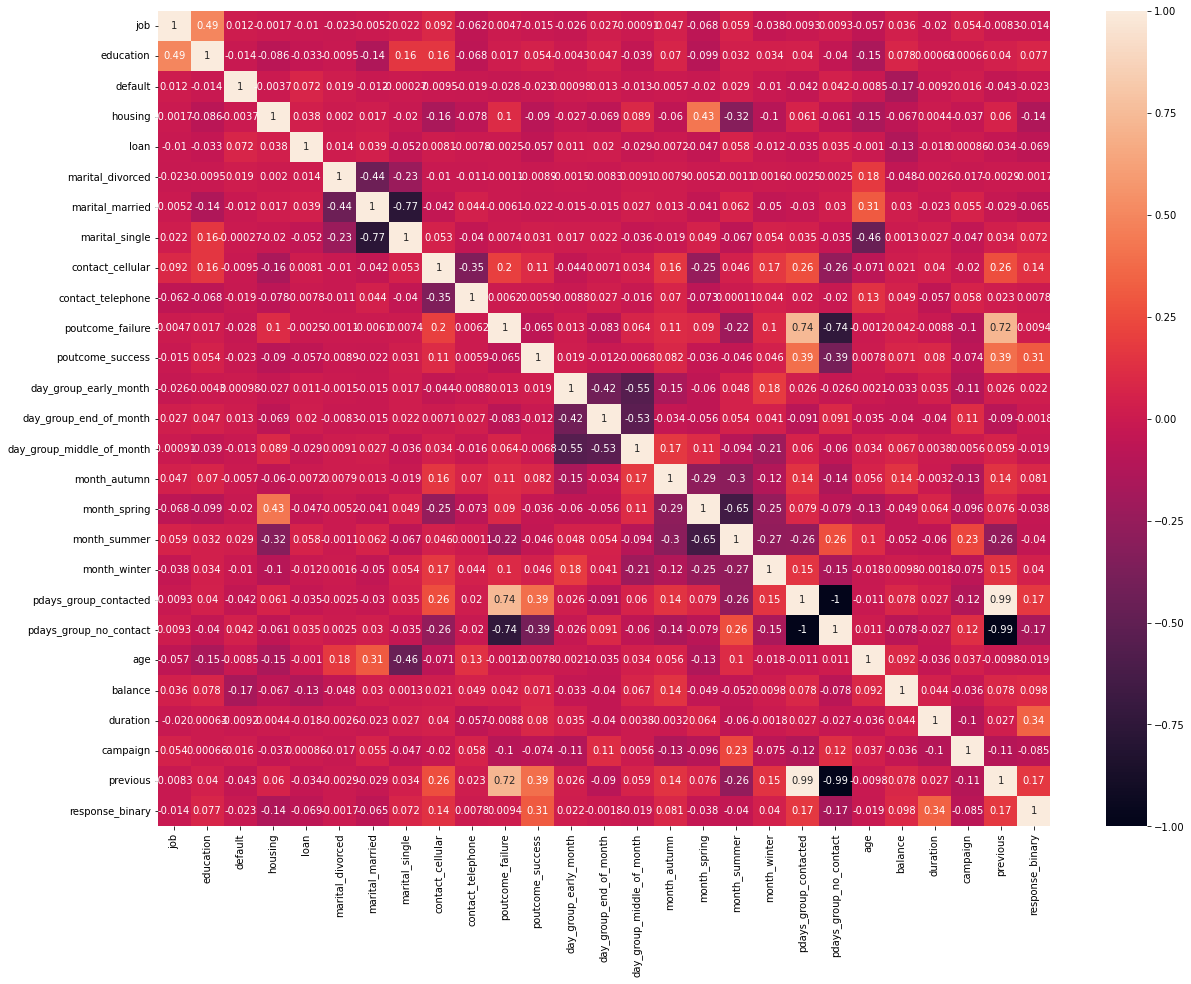

In [ ]:
# Korelasi antarfitur dan fitur dengan target
plt.figure(figsize=(20,15))
sns.heatmap(df_train_merge.corr(method='spearman'),annot=True)

In [ ]:
df_train_merge.columns

Index(['job', 'education', 'default', 'housing', 'loan', 'marital_divorced',
       'marital_married', 'marital_single', 'contact_cellular',
       'contact_telephone', 'poutcome_failure', 'poutcome_success',
       'day_group_early_month', 'day_group_end_of_month',
       'day_group_middle_of_month', 'month_autumn', 'month_spring',
       'month_summer', 'month_winter', 'pdays_group_contacted',
       'pdays_group_no_contact', 'age', 'balance', 'duration', 'campaign',
       'previous', 'response_binary'],
      dtype='object')

In [ ]:
# drop data redundan
df_train_merge = df_train_merge.drop(['marital_married', 'poutcome_failure', 'pdays_group_no_contact', 'pdays_group_contacted'], axis = 1)
df_train_merge.sample()

,job,education,default,housing,loan,marital_divorced,marital_single,contact_cellular,contact_telephone,poutcome_success,day_group_early_month,day_group_end_of_month,day_group_middle_of_month,month_autumn,month_spring,month_summer,month_winter,age,balance,duration,campaign,previous,response_binary
index,,,,,,,,,,,,,,,,,,,,,,,
43825,1,2,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,23,922,538,2,9,1


<AxesSubplot:>

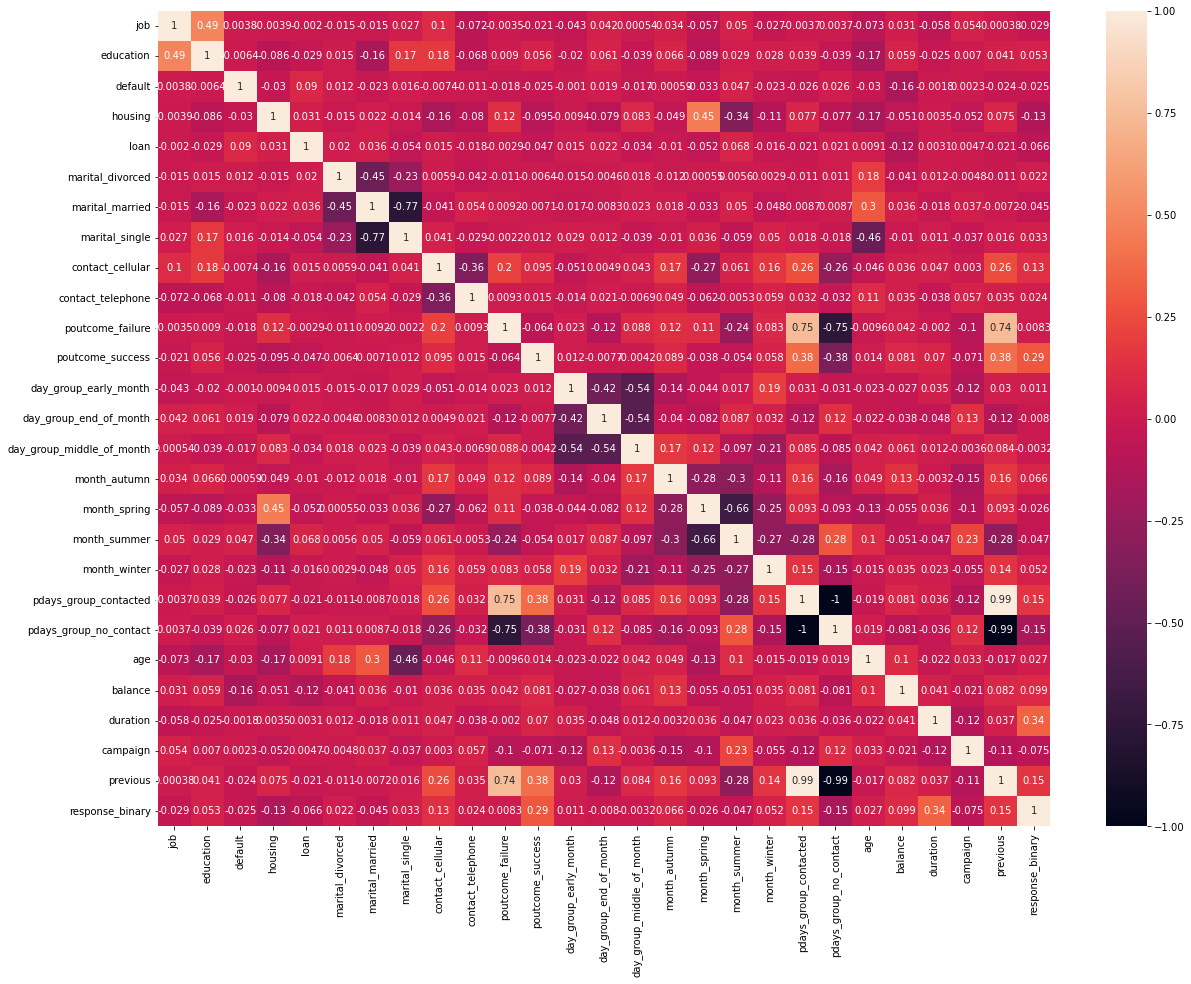

In [ ]:
# Korelasi antarfitur dan fitur dengan target
plt.figure(figsize=(20,15))
sns.heatmap(df_test_merge.corr(method='spearman'),annot=True)

In [ ]:
# drop data redundan
df_test_merge = df_test_merge.drop(['marital_married', 'poutcome_failure', 'pdays_group_no_contact', 'pdays_group_contacted'], axis = 1)
df_test_merge.sample()

,job,education,default,housing,loan,marital_divorced,marital_single,contact_cellular,contact_telephone,poutcome_success,day_group_early_month,day_group_end_of_month,day_group_middle_of_month,month_autumn,month_spring,month_summer,month_winter,age,balance,duration,campaign,previous,response_binary
index,,,,,,,,,,,,,,,,,,,,,,,
28845,5,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,54,0,520,3,0,0


In [ ]:
#drop fitur redundan data train
df_X_train_merge = df_X_train_merge.drop(['marital_married', 'poutcome_failure', 'pdays_group_no_contact', 'pdays_group_contacted'], axis = 1)

In [ ]:
#drop fitur redundan data test
df_X_test_merge = df_X_test_merge.drop(['marital_married', 'poutcome_failure', 'pdays_group_no_contact', 'pdays_group_contacted'], axis = 1)

In [ ]:
df_X_train_merge.sample()

,job,education,default,housing,loan,marital_divorced,marital_single,contact_cellular,contact_telephone,poutcome_success,day_group_early_month,day_group_end_of_month,day_group_middle_of_month,month_autumn,month_spring,month_summer,month_winter,age,balance,duration,campaign,previous
index,,,,,,,,,,,,,,,,,,,,,,
29965,5,2,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,50,167,346,2,3


In [ ]:
df_X_test_merge.sample()

,job,education,default,housing,loan,marital_divorced,marital_single,contact_cellular,contact_telephone,poutcome_success,day_group_early_month,day_group_end_of_month,day_group_middle_of_month,month_autumn,month_spring,month_summer,month_winter,age,balance,duration,campaign,previous
index,,,,,,,,,,,,,,,,,,,,,,
4540,6,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,42,1059,163,2,0


## Handling Outliers

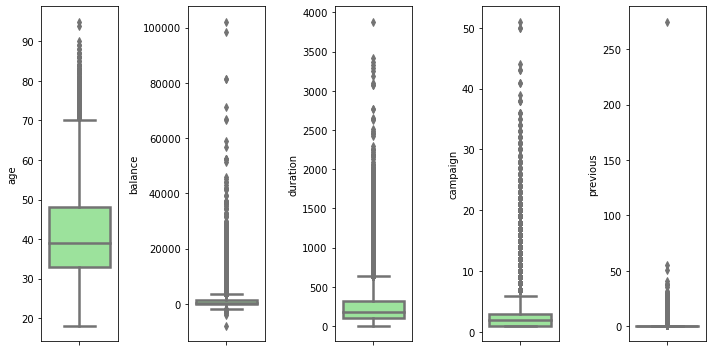

In [ ]:
# Box Plot Data Train
nums_train_new = ['age','balance','duration','campaign','previous']
plt.figure(figsize=(10,5))
for i in range(0, len(nums_train_new)):
    plt.subplot(1, len(nums_train_new), i+1)
    sns.boxplot(y=df_X_train_merge[nums_train_new[i]],color='lightgreen',orient='v')
    plt.tight_layout()

In [ ]:
# handle outliers with z-score
outliers = ['age','balance','duration','campaign','previous']
z_score = np.abs(stats.zscore(df_train_merge[outliers]))
no_outliers_merge = df_train_merge[~(z_score > 3).any(axis=1)]

z_score = np.abs(stats.zscore(df_X_train_merge[outliers]))
no_outliers_X = df_X_train_merge[~(z_score > 3).any(axis=1)]

In [ ]:
no_outliers_merge.shape

(31832, 23)

In [ ]:
no_outliers_X.shape

(31832, 22)

In [ ]:
print('Persentase data yang hilang : ', ((df_X_train_merge.shape[0] - no_outliers_X.shape[0])/df_X_train_merge.shape[0])*100)

Persentase data yang hilang :  7.880190999855303


## Feature Transformation

In [ ]:
cat_num = no_outliers_merge.select_dtypes(include='category').columns.to_list()

for x in cat_num:
    no_outliers_merge[x] = no_outliers_merge[x].astype('uint8')

In [ ]:
cat_num = df_test_merge.select_dtypes(include='category').columns.to_list()

for x in cat_num:
    df_test_merge[x] = df_test_merge[x].astype('uint8')

In [ ]:
tf = vt.YeoJohnsonTransformer(variables = ['age', 'balance','duration','campaign','previous','job','education'])

In [ ]:
# data train
tf.fit(no_outliers_merge)
df_yeo_train= tf.transform(no_outliers_merge)

# data test
df_yeo_test= tf.transform(df_test_merge)

In [ ]:
df_yeo_train.sample(3)

,job,education,default,housing,loan,marital_divorced,marital_single,contact_cellular,contact_telephone,poutcome_success,day_group_early_month,day_group_end_of_month,day_group_middle_of_month,month_autumn,month_spring,month_summer,month_winter,age,balance,duration,campaign,previous,response_binary
index,,,,,,,,,,,,,,,,,,,,,,,
20318,8.620461,3.707842,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,2.991096,1148.530069,9.069610,0.491033,-0.000000,0
43033,0.000000,2.350092,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,3.329718,439.848690,11.798463,0.772448,0.211665,1
16943,8.620461,2.350092,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,3.344368,-80.792342,9.913709,0.491033,-0.000000,0


In [ ]:
df_yeo_test.sample(3)

,job,education,default,housing,loan,marital_divorced,marital_single,contact_cellular,contact_telephone,poutcome_success,day_group_early_month,day_group_end_of_month,day_group_middle_of_month,month_autumn,month_spring,month_summer,month_winter,age,balance,duration,campaign,previous,response_binary
index,,,,,,,,,,,,,,,,,,,,,,,
31114,2.204938,1.100389,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,3.532426,171.559903,8.942326,0.491033,-0.000000,1
44679,8.620461,2.350092,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,3.251256,1894.866593,9.984486,0.726679,0.210506,1
31740,8.620461,2.350092,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,3.181193,5682.208357,0.745851,0.491033,-0.000000,0


In [ ]:
df_yeo_train[['age', 'balance','duration','campaign','previous','job','education']].skew()

age          0.004894
balance      0.547200
duration     0.004360
campaign     0.205665
previous     1.713764
job         -0.158920
education   -0.076197
dtype: float64

In [ ]:
df_yeo_test[['age', 'balance','duration','campaign','previous','job','education']].skew()

age          0.073828
balance      3.151112
duration     0.294059
campaign     0.225735
previous     1.645069
job         -0.138819
education   -0.057033
dtype: float64

A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. <br>
A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. <br>
A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

## Rescaling

In [ ]:
scaler = StandardScaler()
variabel_1 = ['age', 'balance','duration','campaign','previous','job','education']
variabel_2 = ['age_std', 'balance_std', 'duration_std', 'campaign_std', 'previous_std', 'job_std', 'education_std']

# fit data train
scaler.fit(df_yeo_train['age'].values.reshape(len(df_yeo_train),1))
scaler.fit(df_yeo_train['balance'].values.reshape(len(df_yeo_train),1))
scaler.fit(df_yeo_train['duration'].values.reshape(len(df_yeo_train),1))
scaler.fit(df_yeo_train['campaign'].values.reshape(len(df_yeo_train),1))
scaler.fit(df_yeo_train['previous'].values.reshape(len(df_yeo_train),1))
scaler.fit(df_yeo_train['job'].values.reshape(len(df_yeo_train),1))
scaler.fit(df_yeo_train['education'].values.reshape(len(df_yeo_train),1))


StandardScaler()

In [ ]:

# transform data_train
df_yeo_train['age_std']      =scaler.transform(df_yeo_train['age'].values.reshape(len(df_yeo_train),1))
df_yeo_train['balance_std']  =scaler.transform(df_yeo_train['balance'].values.reshape(len(df_yeo_train),1))
df_yeo_train['duration_std'] =scaler.transform(df_yeo_train['duration'].values.reshape(len(df_yeo_train),1))
df_yeo_train['campaign_std'] =scaler.transform(df_yeo_train['campaign'].values.reshape(len(df_yeo_train),1))
df_yeo_train['previous_std'] =scaler.transform(df_yeo_train['previous'].values.reshape(len(df_yeo_train),1))
df_yeo_train['job_std']      =scaler.transform(df_yeo_train['job'].values.reshape(len(df_yeo_train),1))
df_yeo_train['education_std']=scaler.transform(df_yeo_train['education'].values.reshape(len(df_yeo_train),1))

# transform data test
df_yeo_test['age_std']      =scaler.transform(df_yeo_test['age'].values.reshape(len(df_yeo_test),1))
df_yeo_test['balance_std']  =scaler.transform(df_yeo_test['balance'].values.reshape(len(df_yeo_test),1))
df_yeo_test['duration_std'] =scaler.transform(df_yeo_test['duration'].values.reshape(len(df_yeo_test),1))
df_yeo_test['campaign_std'] =scaler.transform(df_yeo_test['campaign'].values.reshape(len(df_yeo_test),1))
df_yeo_test['previous_std'] =scaler.transform(df_yeo_test['previous'].values.reshape(len(df_yeo_test),1))
df_yeo_test['job_std']      =scaler.transform(df_yeo_test['job'].values.reshape(len(df_yeo_test),1))
df_yeo_test['education_std']=scaler.transform(df_yeo_test['education'].values.reshape(len(df_yeo_test),1))


In [ ]:
df_yeo_train.sample()

,job,education,default,housing,loan,marital_divorced,marital_single,contact_cellular,contact_telephone,poutcome_success,day_group_early_month,day_group_end_of_month,day_group_middle_of_month,month_autumn,month_spring,month_summer,month_winter,age,balance,duration,campaign,previous,response_binary,age_std,balance_std,duration_std,campaign_std,previous_std,job_std,education_std
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10012,7.270569,2.350092,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,3.103099,1231.162007,14.31976,0.649223,-0.0,0,0.611632,1413.537766,13.516805,-2.211642,-2.958596,5.406456,-0.254731


In [ ]:
df_yeo_test.sample()

,job,education,default,housing,loan,marital_divorced,marital_single,contact_cellular,contact_telephone,poutcome_success,day_group_early_month,day_group_end_of_month,day_group_middle_of_month,month_autumn,month_spring,month_summer,month_winter,age,balance,duration,campaign,previous,response_binary,age_std,balance_std,duration_std,campaign_std,previous_std,job_std,education_std
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9934,7.270569,1.100389,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,3.487273,1880.834607,10.873368,0.491033,-0.0,0,1.053638,2161.009559,9.551607,-2.393644,-2.958596,5.406456,-1.692559


In [ ]:
df_yeo_train.drop(variabel_1, axis = 1, inplace = True)
df_yeo_test.drop(variabel_1, axis = 1, inplace = True)

In [ ]:
#pemisahan feature dan target
X_train = df_yeo_train.drop('response_binary', axis=1).copy()
y_train = df_yeo_train[['response_binary']].copy()

X_test = df_yeo_test.drop('response_binary', axis=1).copy()
y_test = df_yeo_test[['response_binary']].copy()

In [ ]:
# Menggabungkan X_test dan X_train untuk keperluan cross_validation
X_full = pd.concat([X_train, X_test])

# Menggabungkan y_test dan y_train untuk keperluan cross_validation
y_full = pd.concat([y_train, y_test])

In [ ]:
X_full

,default,housing,loan,marital_divorced,marital_single,contact_cellular,contact_telephone,poutcome_success,day_group_early_month,day_group_end_of_month,day_group_middle_of_month,month_autumn,month_spring,month_summer,month_winter,age_std,balance_std,duration_std,campaign_std,previous_std,job_std,education_std
index,,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1.026262,1048.954149,9.160736,-2.393644,-2.958596,11.783725,1.307411
2,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0.562561,-0.840285,5.181855,-2.393644,-2.958596,10.150729,-0.254731
5,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0.611632,147.536789,6.997524,-2.393644,-2.958596,11.783725,1.307411
6,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0.424781,265.032772,8.496521,-2.393644,-2.958596,11.783725,1.307411
7,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0.762706,-0.840285,10.595101,-2.393644,-2.958596,10.150729,1.307411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45184,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1.092932,765.533641,6.974382,-2.393644,-2.715095,-0.421735,-0.254731
45199,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0.587476,756.561345,15.617315,-2.122525,-2.715045,5.406456,-0.254731
45201,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0.953174,334.989747,8.640496,-2.393644,-2.715165,11.783725,1.307411


## Feature Engineering
(menentukan feature apa saja yang akan digunakan, feature apa yang perlu ditambahkan, dan reformatting feature sesuai kebutuhan)

### Kategorikal

In [ ]:
fitur_cat = ['default', 'housing', 'loan', 'marital_divorced', 'marital_single', 'contact_cellular','contact_telephone', 'poutcome_success',
            'day_group_early_month', 'day_group_end_of_month', 'day_group_middle_of_month', 'month_winter', 'month_spring', 'month_summer', 'month_autumn']

In [ ]:
chi_score, pvalue = chi2(X_train[fitur_cat], y_train)

In [ ]:
chi_score

array([1.04065068e+01, 2.93700092e+02, 1.28941896e+02, 2.66171584e+00,
       1.24225471e+02, 2.34933299e+02, 1.26050878e-01, 3.07456287e+03,
       1.29718816e+01, 3.26118027e-01, 1.30063768e+01, 4.42764461e+01,
       2.87643184e+01, 3.21181183e+01, 2.06614717e+02])

In [ ]:
#Cek pvalue dari feature kategori dari hasil test

h1_feature = []

for i in range(len(fitur_cat)):
    print('Feature kategori', fitur_cat[i], ': ', 'pvalue ', pvalue[i], 'chi_score', chi_score[i])
    if ((pvalue[i] < 0.05) & (chi_score[i] > 3.84)):
        print(fitur_cat[i], ':', 'P-Value < 0.05 & chi_score > 3.84')
        print('------------------------------------------------------------') 
    else:
        print(fitur_cat[i], ':', 'tidak memenuhi syarat')
        print('------------------------------------------------------------') 
        h1_feature.append(fitur_cat[i])
print('------------------------------------------------------------')    
print('Feature kategori baik jika P-Value < 0.05 dan chi-square score > 3.84')


Feature kategori default :  pvalue  0.0012557205360768486 chi_score 10.4065068494727
default : P-Value < 0.05 & chi_score > 3.84
------------------------------------------------------------
Feature kategori housing :  pvalue  7.76885460177471e-66 chi_score 293.70009228252104
housing : P-Value < 0.05 & chi_score > 3.84
------------------------------------------------------------
Feature kategori loan :  pvalue  6.983301566656783e-30 chi_score 128.94189633146493
loan : P-Value < 0.05 & chi_score > 3.84
------------------------------------------------------------
Feature kategori marital_divorced :  pvalue  0.10278979723515407 chi_score 2.661715837716385
marital_divorced : tidak memenuhi syarat
------------------------------------------------------------
Feature kategori marital_single :  pvalue  7.519486456196499e-29 chi_score 124.22547083857205
marital_single : P-Value < 0.05 & chi_score > 3.84
------------------------------------------------------------
Feature kategori contact_cellula

In [ ]:
# drop marital_divorced dan contact_telephone karena p-value > 0.05
X_train.drop(['marital_divorced','contact_telephone', 'day_group_end_of_month'], axis = 1, inplace = True)
X_test.drop(['marital_divorced','contact_telephone', 'day_group_end_of_month'], axis = 1, inplace = True)

In [ ]:
X_train.sample()

,default,housing,loan,marital_single,contact_cellular,poutcome_success,day_group_early_month,day_group_middle_of_month,month_autumn,month_spring,month_summer,month_winter,age_std,balance_std,duration_std,campaign_std,previous_std,job_std,education_std
index,,,,,,,,,,,,,,,,,,,
5976,0,1,1,0,0,0,0,0,0,1,0,0,0.482768,661.355167,10.938565,-2.211642,-2.958596,3.886158,-0.254731


In [ ]:
X_test.sample()

,default,housing,loan,marital_single,contact_cellular,poutcome_success,day_group_early_month,day_group_middle_of_month,month_autumn,month_spring,month_summer,month_winter,age_std,balance_std,duration_std,campaign_std,previous_std,job_std,education_std
index,,,,,,,,,,,,,,,,,,,
44451,0,0,0,0,1,0,1,0,0,0,1,0,0.819472,1020.655942,7.517239,-2.393644,-2.958596,11.783725,1.307411


In [ ]:
X_train.shape

(31832, 19)

In [ ]:
X_test.shape

(8638, 19)

In [ ]:
y_train.shape

(31832, 1)

In [ ]:
y_test.shape

(8638, 1)

### Numerikal

In [ ]:
f_score, p_value = f_classif(X_train[variabel_2], y_train)

In [ ]:
f_score

array([  27.92058502,  196.86400977, 3752.10401651,  231.00168937,
        991.60021218,    4.41612114,  248.15299851])

In [ ]:
#Cek pvalue dari feature kategori dari hasil test

anova = []

for i in range(len(variabel_2)):
    print('Feature kategori', variabel_2[i], ': ', 'pvalue ', p_value[i])
    if p_value[i] < 0.05:
        print(variabel_2[i], ':', 'P-Value < 0.05')
    else:
        print(variabel_2[i], ':', 'P-Value > 0.05')
        anova.append(variabel_2[i])
print('------------------------------------------------------------')    
print('Feature kategori baik jika P-Value < 0.05')


Feature kategori age_std :  pvalue  1.2722870958762724e-07
age_std : P-Value < 0.05
Feature kategori balance_std :  pvalue  1.3714856621426204e-44
balance_std : P-Value < 0.05
Feature kategori duration_std :  pvalue  0.0
duration_std : P-Value < 0.05
Feature kategori campaign_std :  pvalue  5.490392967516173e-52
campaign_std : P-Value < 0.05
Feature kategori previous_std :  pvalue  2.358611614692874e-214
previous_std : P-Value < 0.05
Feature kategori job_std :  pvalue  0.035608716812954244
job_std : P-Value < 0.05
Feature kategori education_std :  pvalue  1.0660022941590475e-55
education_std : P-Value < 0.05
------------------------------------------------------------
Feature kategori baik jika P-Value < 0.05


**Tidak ada fitur yang didrop karena p_value semua fitur numeric < 0.05, signifikan berpengaruh terhadap target.**

### Save X_train, y_train, X_test, y_test, X_full, y_full to excel

X_train = X_train.reset_index()
X_test = X_test.reset_index()
X_full = X_full.reset_index()

y_train = y_train.reset_index()
y_test = y_test.reset_index()
y_full = y_full.reset_index()

X_train.to_excel('X_train_year.xlsx', index = False)
X_test.to_excel('X_test_year.xlsx', index = False)
X_full.to_excel('X_full_year.xlsx', index = False)

y_train.to_excel('y_train_year.xlsx', index = False)
y_test.to_excel('y_test_year.xlsx', index = False)
y_full.to_excel('y_full_year.xlsx', index = False)

In [ ]:
df_stage1['duration'].sum()

11157763

In [ ]:
11671811/60

194530.18333333332

In [ ]:
194530/60

3242.1666666666665

## Drop less importance feature

In [ ]:
# drop fitur day
X_train.drop(['default'], axis = 1, inplace = True)
X_test.drop(['default'], axis = 1, inplace = True)

# Model Machine Learning

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, roc_curve, fbeta_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    pred_y = model.predict(X_test)
    pred_train_y = model.predict(X_train)
    pred_proba_test_y = model.predict_proba(X_test)
    pred_proba_train_y = model.predict_proba(X_train)
    
    cv = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
    pred_thresh = np.where(pred_proba_test_y[:, 1] >= 0.41, 1, 0)
    
    #print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, pred_train_y))
    #print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, pred_y))
    
    print("Precision (Train Set): %.2f" % round(precision_score(y_train, pred_train_y)*100, 2), "%")
    print("Precision (Test Set): %.2f" % round(precision_score(y_test, pred_y)*100,2), "%")
    
    print("Recall (Train Set): %.2f" % round(recall_score(y_train, pred_train_y)*100, 2), "%")
    print("Recall (Test Set): %.2f" % round(recall_score(y_test, pred_y)*100, 2), "%")
    
    #print("MCC (Train Set): %.2f" % matthews_corrcoef(y_train, pred_train_y))
    #print("MCC (Test Set): %.2f" % matthews_corrcoef(y_test, pred_y))
    
    print("F-Beta-Score (Train Set): %.2f" % round(fbeta_score(y_train, pred_train_y, beta=0.5)*100,2), "%")
    print("F-Beta-Score (Test Set): %.2f" % round(fbeta_score(y_test, pred_y, beta=0.5)*100,2), "%")
    
    print("roc_auc (train-proba): %.2f" % round(roc_auc_score(y_train, pred_proba_train_y[:, 1])*100,2), "%")
    print("roc_auc (test-proba): %.2f" % round(roc_auc_score(y_test, pred_proba_test_y[:, 1])*100,2), "%")
    
    #score1 = cross_validate(model, X_full, y_full, cv=cv, scoring='f1', return_train_score=True)
    #print('f1 (crossval train): '+ str(score1['train_score'].mean()))
    #print('f1 (crossval test): '+ str(score1['test_score'].mean()))
    
    score = cross_validate(model, X_full, y_full, cv=cv, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(round(score['train_score'].mean()*100,2)), "%")
    print('roc_auc (crossval test): '+ str(round(score['test_score'].mean()*100,2)), "%")
    
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Precision (Train Set): 62.57 %
Precision (Test Set): 61.82 %
Recall (Train Set): 28.46 %
Recall (Test Set): 33.07 %
F-Beta-Score (Train Set): 50.47 %
F-Beta-Score (Test Set): 52.66 %
roc_auc (train-proba): 88.45 %
roc_auc (test-proba): 88.12 %
roc_auc (crossval train): 88.31 %
roc_auc (crossval test): 88.26 %


## Decision Tree

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Precision (Train Set): 100.00 %
Precision (Test Set): 41.03 %
Recall (Train Set): 100.00 %
Recall (Test Set): 45.12 %
F-Beta-Score (Train Set): 100.00 %
F-Beta-Score (Test Set): 41.79 %
roc_auc (train-proba): 100.00 %
roc_auc (test-proba): 68.30 %
roc_auc (crossval train): 100.0 %
roc_auc (crossval test): 67.4 %


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Precision (Train Set): 100.00 %
Precision (Test Set): 64.11 %
Recall (Train Set): 99.97 %
Recall (Test Set): 35.76 %
F-Beta-Score (Train Set): 99.99 %
F-Beta-Score (Test Set): 55.33 %
roc_auc (train-proba): 100.00 %
roc_auc (test-proba): 90.48 %
roc_auc (crossval train): 100.0 %
roc_auc (crossval test): 91.15 %


## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
eval_classification(clf)

Precision (Train Set): 61.77 %
Precision (Test Set): 60.77 %
Recall (Train Set): 33.45 %
Recall (Test Set): 35.96 %
F-Beta-Score (Train Set): 52.82 %
F-Beta-Score (Test Set): 53.40 %
roc_auc (train-proba): 89.64 %
roc_auc (test-proba): 89.06 %
roc_auc (crossval train): 89.84 %
roc_auc (crossval test): 89.31 %


## XGBoost

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [ ]:
xgb1a = XGBClassifier()
xgb1a.fit(X_train, y_train)
eval_classification(xgb1a)

Precision (Train Set): 88.45 %
Precision (Test Set): 61.18 %
Recall (Train Set): 63.01 %
Recall (Test Set): 45.52 %
F-Beta-Score (Train Set): 81.84 %
F-Beta-Score (Test Set): 57.24 %
roc_auc (train-proba): 97.51 %
roc_auc (test-proba): 90.69 %
roc_auc (crossval train): 97.2 %
roc_auc (crossval test): 91.32 %


In [ ]:
xgb1 = XGBClassifier(objective= 'binary:logistic', 
                     tree_method= 'hist', 
                     #scale_pos_weight=8.73, 
                     max_delta_step= 8, 
                     random_state = 42)
xgb1.fit(X_train, y_train)
eval_classification(xgb1)

Precision (Train Set): 88.98 %
Precision (Test Set): 60.27 %
Recall (Train Set): 63.93 %
Recall (Test Set): 39.74 %
F-Beta-Score (Train Set): 82.51 %
F-Beta-Score (Test Set): 54.63 %
roc_auc (train-proba): 97.70 %
roc_auc (test-proba): 90.65 %
roc_auc (crossval train): 97.51 %
roc_auc (crossval test): 91.26 %


In [ ]:
xgb_param = xgb1.get_xgb_params()
xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
cv_result = xgb.cv(xgb_param, xgtrain, num_boost_round=xgb1.get_params()['n_estimators'], nfold=5, stratified=True,
                  metrics='auc', early_stopping_rounds=50, verbose_eval=False)

In [ ]:
cv_result.shape[0]

36

In [ ]:
cv = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

In [ ]:
param_test1 = {
    'max_depth':range(1,10,1),
    'min_child_weight':range(1,10,1)    
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(n_estimators=36,
                                                  objective= 'binary:logistic', 
                                                  tree_method= 'hist', 
                                                  #scale_pos_weight=8.73, 
                                                  max_delta_step= 8, 
                                                  random_state = 42),
                        param_grid = param_test1, scoring='roc_auc', n_jobs=-1, cv=cv)
gsearch1.fit(X_train,y_train)
#pd.DataFrame(gsearch1.cv_results_), 
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 5, 'min_child_weight': 3}, 0.9138012371857277)

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(n_estimators=36,
                                                  max_depth=5,
                                                  min_child_weight=3,
                                                  objective= 'binary:logistic', 
                                                  tree_method= 'hist', 
                                                  #scale_pos_weight=8.73, 
                                                  max_delta_step=8, 
                                                  random_state=42),
                        param_grid = param_test3, scoring='roc_auc', n_jobs=-1, cv=cv)
gsearch3.fit(X_train,y_train)
#pd.DataFrame(gsearch2.cv_results_),
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.1}, 0.9140230500566648)

In [ ]:
param_test4 = {
 'subsample':[i/100.0 for i in range(50,95,5)],
 'colsample_bytree':[i/100.0 for i in range(50,95,5)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.05,
                                                  n_estimators=36,
                                                  max_depth=5,
                                                  min_child_weight=3,
                                                  gamma=0.1,
                                                  colsample_bytree=0.7,
                                                  subsample=0.8,
                                                  objective= 'binary:logistic', 
                                                  tree_method= 'hist', 
                                                  #scale_pos_weight=8.73, 
                                                  max_delta_step= 8, 
                                                  random_state = 42),
                        param_grid = param_test4, scoring='roc_auc', n_jobs=-1, cv=cv)
gsearch4.fit(X_train,y_train)
#pd.DataFrame(gsearch2.cv_results_),
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.6, 'subsample': 0.65}, 0.9073954613817395)

### Metrics After Hyperparameter Tuning

In [ ]:
xgb1 = XGBClassifier(learning_rate = 0.05,
                     n_estimators=300,
                     max_depth=5,
                     min_child_weight=3,
                     gamma=0.1,
                     colsample_bytree=0.7,
                     subsample=0.8,
                     objective= 'binary:logistic', 
                     tree_method= 'hist', 
                     #scale_pos_weight=8.73, 
                     max_delta_step= 8, 
                     random_state = 42)
xgb1.fit(X_train, y_train)
eval_classification(xgb1)

Precision (Train Set): 76.21 %
Precision (Test Set): 65.44 %
Recall (Train Set): 43.78 %
Recall (Test Set): 40.74 %
F-Beta-Score (Train Set): 66.38 %
F-Beta-Score (Test Set): 58.36 %
roc_auc (train-proba): 94.22 %
roc_auc (test-proba): 91.29 %
roc_auc (crossval train): 94.31 %
roc_auc (crossval test): 91.95 %


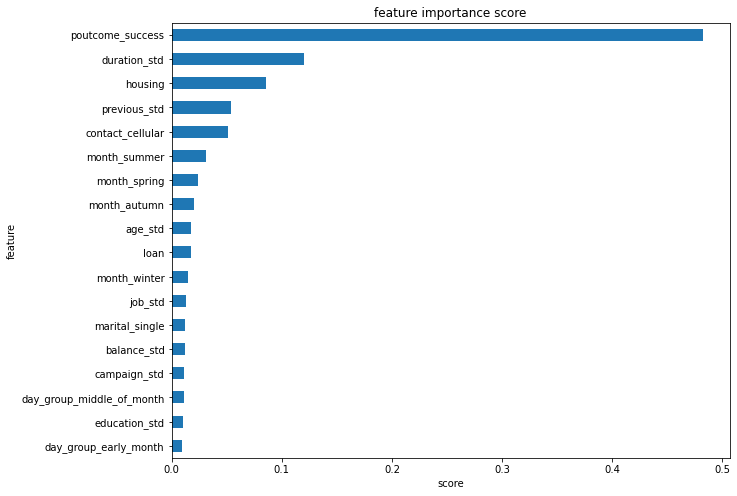

In [ ]:
show_feature_importance(gsearch4.best_estimator_)

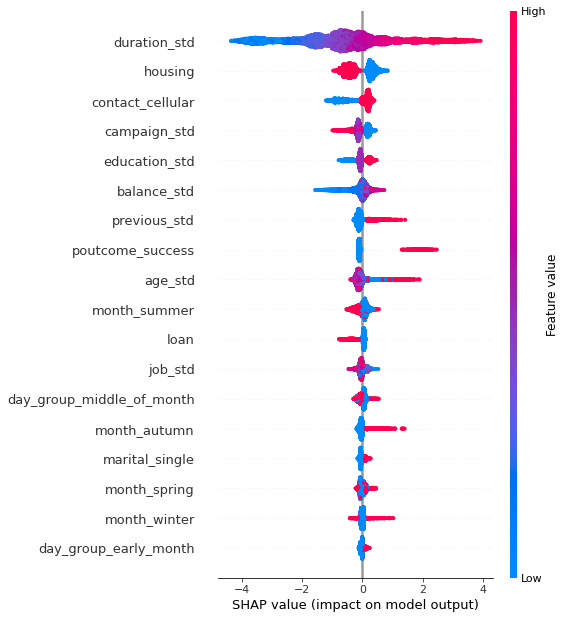

In [ ]:
import shap
explainer = shap.TreeExplainer(xgb1)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test) # Summary shap value terhadap label positive

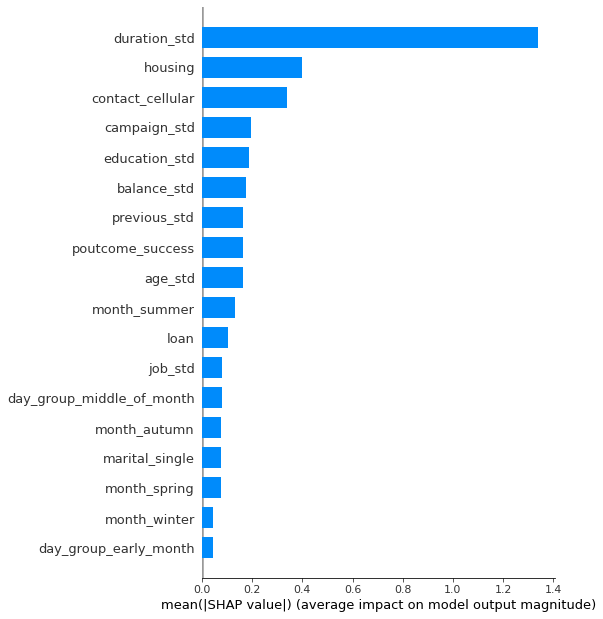

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
X_sampled = X_train.sample(100, random_state=42)
shap_values_1 = explainer.shap_values(X_sampled)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_1[0,:], X_sampled.iloc[0,:])

### Confusion Matrix

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7634
           1       0.65      0.41      0.50      1004

    accuracy                           0.91      8638
   macro avg       0.79      0.69      0.73      8638
weighted avg       0.89      0.91      0.90      8638



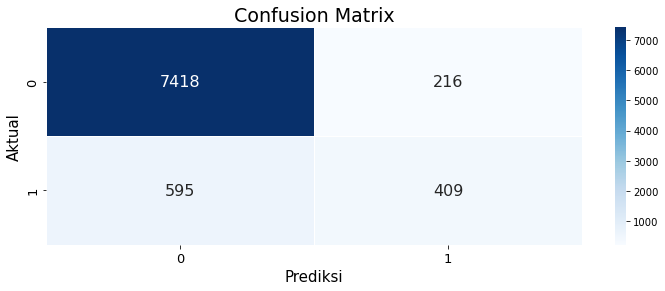

In [ ]:
from sklearn.metrics import matthews_corrcoef, confusion_matrix, classification_report
pred_y = xgb1.predict(X_test)
# Confusion Matrix Test
cnf_matrix = confusion_matrix(y_test, pred_y)
print(classification_report(y_test, pred_y))
sns.heatmap(cnf_matrix,cmap='Blues',annot=True,linewidth=0.5,fmt='d',annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=19)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Prediksi',fontsize=15)
plt.ylabel('Aktual', fontsize=15)
plt.show()

In [ ]:
pred_y = xgb1.predict(X_test)
pred_train_y = xgb1.predict(X_train)
pred_proba_test_y = xgb1.predict_proba(X_test)
pred_proba_train_y = xgb1.predict_proba(X_train)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred_proba_test_y[:, 1])
thresholds

array([1.9526207e+00, 9.5262074e-01, 9.4670725e-01, ..., 3.7847275e-03,
       3.7846644e-03, 2.0148118e-04], dtype=float32)

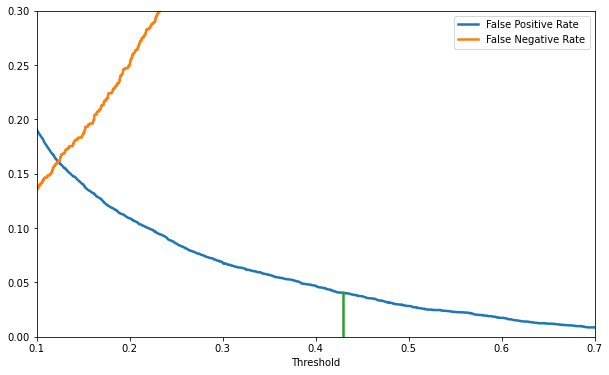

In [ ]:
dfplot=pd.DataFrame({'Threshold':thresholds, 
                     'False Positive Rate':fpr, 
                     'False Negative Rate': 1.-tpr})
ax=dfplot.plot(x='Threshold', y=['False Positive Rate', 'False Negative Rate'], figsize=(10,6))
ax.plot([0.43,0.43],[0,0.04]) #mark example thresh.
ax.set_xbound(0.1,0.7); ax.set_ybound(0,0.3) #zoom in

In [ ]:
def conf_matrix(y,pred):
    ((tn, fp), (fn, tp)) = metrics.confusion_matrix(y, pred)
    ((tnr,fpr),(fnr,tpr))= metrics.confusion_matrix(y, pred, normalize='true')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0', 'True 1'], 
            columns=['Pred 0', 'Pred 1'])
conf_matrix(y_test,pred_y)

,Pred 0,Pred 1
True 0,TN = 7418 (TNR = 97.17%),FP = 216 (FPR = 2.83%)
True 1,FN = 595 (FNR = 59.26%),TP = 409 (TPR = 40.74%)


In [ ]:
pred_thresh = np.where(pred_proba_test_y[:, 1] >= 0.43, 1, 0)
conf_matrix(y_test, pred_thresh)

,Pred 0,Pred 1
True 0,TN = 7325 (TNR = 95.95%),FP = 309 (FPR = 4.05%)
True 1,FN = 513 (FNR = 51.10%),TP = 491 (TPR = 48.90%)


In [ ]:
print("Precision (Test Set): %.2f" % round(precision_score(y_test, pred_thresh)*100,2), "%")
print("Recall (Test Set): %.2f" % round(recall_score(y_test, pred_thresh)*100, 2), "%")
print("F-Beta-Score (Test Set): %.2f" % round(fbeta_score(y_test, pred_thresh, beta=0.5)*100,2), "%")
print("roc_auc (test-proba): %.2f" % round(roc_auc_score(y_test, pred_proba_test_y[:, 1])*100,2), "%")

Precision (Test Set): 61.38 %
Recall (Test Set): 48.90 %
F-Beta-Score (Test Set): 58.40 %
roc_auc (test-proba): 91.29 %


### ROC_Curve

In [ ]:
roc_auc_value = roc_auc_score(y_test, pred_proba_test_y[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for XGBClassifier on data test: ', round(roc_auc_value*100, 2), '%')
print('Gini for XGBClassifier on data test: ', round(gini_value*100, 2), '%')

AUC for XGBClassifier on data test:  91.29 %
Gini for XGBClassifier on data test:  82.58 %


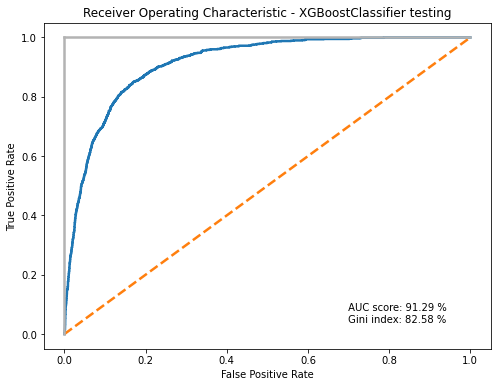

In [ ]:
fig, ax = plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - XGBoostClassifier testing')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.text(ax.get_xlim()[1]*6/10, 
         0, 
         f"""\n
         AUC score: {round(roc_auc_value*100, 2)} %
         Gini index: {round(gini_value*100, 2)} %
         """)

plt.show()

## SOP Call Center

1. Greetings dan menyampaikan tujuan menelepon (1 menit)
2. Konfirmasi identitas nasabah (1 menit)
3. Menanyakan data terbaru nasabah, seperti no.hp, alamat, email (1-2 menit)
4. Memperkenalkan produk deposito berjangka dan benefitnya secara umum (2-3 menit)
5. Menanyakan apakah nasabah tertarik membuka deposito.
6. (Yes)Jika Nasabah tertarik, bisa ditawarkan produk-produk depositonya, lebih tertarik yang mana. Dijelaskan alur pendaftaran deposito. Dan kapan berencana membuka tabungan deposito berjangka.Jangan lupa di follow up. (NO)Jika Nasabah tidak tertarik, ditanya alasannya apa. Dan ditanya mengenai kemungkinan apakah tertarik untuk membuka deposito di masa mendatang.
7. Penutup mengucapkan terima kasih.